# Exploratory Data Analysis Notebook

Welcome to the Exploratory Data Analysis (EDA) Notebook. EDA is all about understanding the data, gaining insights, and identifying patterns which will inform how we model the data.

In this part of the project, we're going to dig into our movie data to see what makes a movie successful. We're looking at success in three different ways:

**Return on Investment (ROI):**

ROI is a performance measure used to evaluate the efficiency or profitability of an investment, or to compare the efficiency of different investments. In the context of movies, it's computed as the ratio of revenue to budget. This metric is crucial as it helps investors understand the financial return they might expect from their investment in a particular movie. It's a clear indicator of financial success.

**Rating Metric:**
Ratings are critical in the movie industry as they reflect the audience's reception. In this analysis, we intend to aggregate ratings from different rating systems to form an overall rating metric. This will provide a more holistic view of a movie's reception across various platforms and audiences.

**Awards Metric:**
Awards and nominations are a testament to a movie's quality and acceptance within the industry. They can significantly boost a movie's reputation and, by extension, its financial success. Creating an awards metric will help in understanding the recognition a movie has received in the industry.

Now, we'll go through our data, looking at how different bits of information (like the movie's genre or the month it was released) might affect these three success measures. This will help us later when we build our model to predict a movie's success.

## Objectives:
- **Distribution Analysis**: Understanding the distribution of various features.
- **Outlier Detection**: Detecting and handling outliers.
- **Correlation Analysis**: Identifying relationships between different variables.
- **Trend Analysis**: Discovering trends within the data.
- **Feature Engineering**: Creating new features to better capture the underlying patterns in the data.

## Dataset:
In this notebook, we will be working with the cleaned dataset located at `./data/cleaned/movies_dataset.parquet`, which is the result of the cleaning process carried out in the preceding Data Cleaning Notebook.


In [761]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [762]:
df = pd.read_parquet('../data/cleaned/movies_dataset.parquet')

In [763]:
# Set the float format to display the entire number
pd.options.display.float_format = '{:.2f}'.format
df.describe()

release_year  release_month  runtime  tmdb_popularity  tmdb_rating  \
count       6985.00        6985.00  6985.00          6985.00      6985.00   
mean        1998.40           6.94   108.89            18.28        63.08   
std           14.67           3.39    22.10            18.18         9.62   
min         1947.00           1.00     0.00             0.00         0.00   
25%         1991.00           4.00    94.00             8.39        58.00   
50%         2003.00           7.00   105.00            14.04        63.64   
75%         2009.00          10.00   119.00            22.14        69.32   
max         2023.00          12.00   310.00           353.48       100.00   

       tmdb_vote_count  oscar_won  oscar_nominated  bafta_won  \
count          6985.00    6985.00          6985.00    6985.00   
mean           1682.75       0.15             0.23       0.01   
std            3110.17       0.74             0.82       0.10   
min               0.00       0.00             0.00       0.00   
25%             132.00       0.00             0.00       0.00   
50%             532.00       0.00             0.00       0.00   
75%            1730.00       0.00             0.00       0.00   
max           34612.00      11.00            11.00       4.00   

       bafta_nominated  awards_won  awards_nominated  rotten_tomatoes_rating  \
count          6985.00     6985.00           6985.00                 5880.00   
mean              0.03        5.80             10.84                   56.01   
std               0.21       14.74             22.34                   28.01   
min               0.00        0.00              0.00                    0.00   
25%               0.00        0.00              1.00                   32.00   
50%               0.00        1.00              4.00                   59.00   
75%               0.00        5.00             11.00                   81.00   
max               5.00      245.00            337.00                  100.00   

       metacritic_rating  imdb_rating  imdb_votes  adjusted_budget  \
count            5223.00      6980.00     6983.00          6984.00   
mean               55.26        63.58    99106.58      44549069.74   
std                18.26        10.72   193008.79      54342309.00   
min                 1.00        13.00        7.00          2095.57   
25%                42.00        57.00     8490.50       8465892.33   
50%                56.00        64.00    32645.00      26029952.24   
75%                68.00        71.00   104796.50      57143313.88   
max               100.00        93.00  2802199.00     512244953.43   

       adjusted_revenue  adjusted_boxoffice  
count           6984.00             5526.00  
mean       131529133.85         81974060.49  
std        255188845.67        132706372.54  
min             1387.86              507.16  
25%          8269910.17          6995790.32  
50%         40298971.06         38442573.18  
75%        135328879.68        102208263.31  
max       4254454876.30       2326748295.11

### ROI

First of all, I'm going to calculate ROI. ROI is calculated by taking the total revenue of a movie, subtracting the budget, and then dividing by the budget once more.

Formula (revenue - budget) / budget * 100%

Now, why do we use the revenue and budget columns to calculate ROI and not consider the BoxOffice column?

The revenue column typically represents the global revenue generated by a movie, encompassing not just box office revenue but also other revenue streams like home video sales, TV rights, and merchandise. Also, the revenue and budget columns have more complete data as compared to the BoxOffice column, which has a number of missing values. Utilizing columns with more complete data allows for a more accurate and reliable calculation of ROI.


In [764]:
df[['adjusted_budget', 'adjusted_revenue', 'adjusted_boxoffice']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985 entries, 0 to 7396
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adjusted_budget     6984 non-null   float64
 1   adjusted_revenue    6984 non-null   float64
 2   adjusted_boxoffice  5526 non-null   float64
dtypes: float64(3)
memory usage: 218.3 KB


Look at characteristics of revenue and budget in our dataset
Plot log and non logged dat

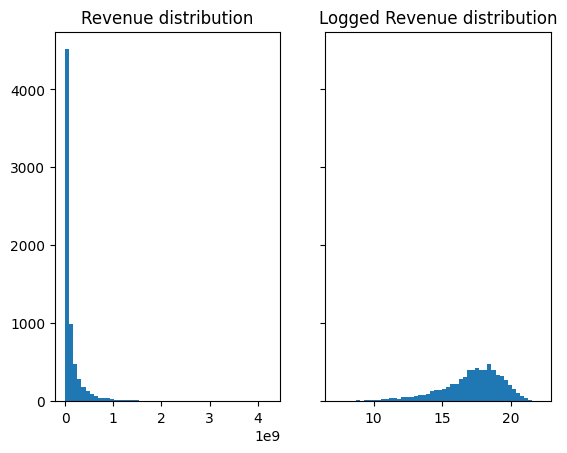

In [765]:
#Plot movie revenue data both logged and non logged
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(df['adjusted_revenue'], bins=50)
axs[0].set_title('Revenue distribution')
axs[1].hist(np.log(df['adjusted_revenue']), bins=50)
axs[1].set_title('Logged Revenue distribution')
plt.show()

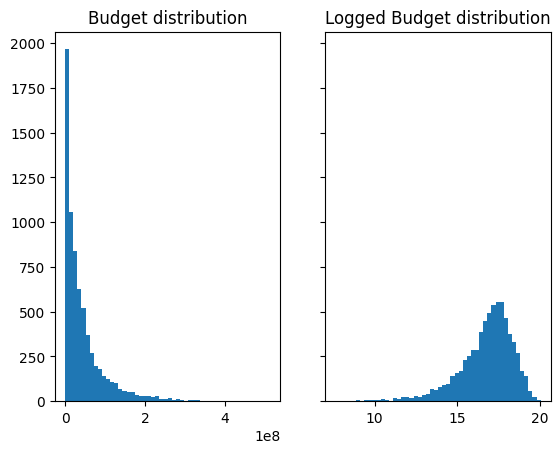

In [766]:
#Plot movie budget data both logged and non logged
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].hist(df['adjusted_budget'], bins=50)
axs[0].set_title('Budget distribution')
axs[1].hist(np.log(df['adjusted_budget']), bins=50)
axs[1].set_title('Logged Budget distribution')
plt.show()

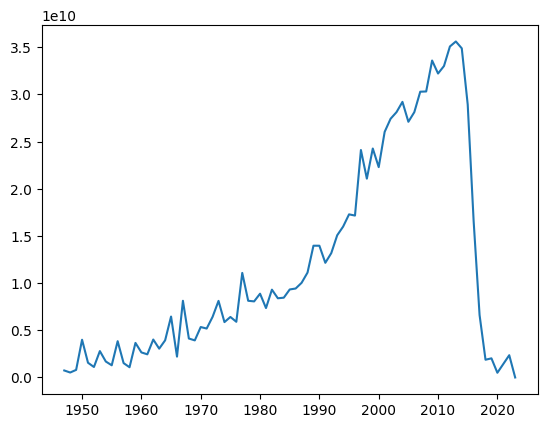

In [767]:
#Print out yearly adjusted revenue
plot_rev = df.groupby(['release_year'])['adjusted_revenue'].agg('sum')
plt.plot(plot_rev )

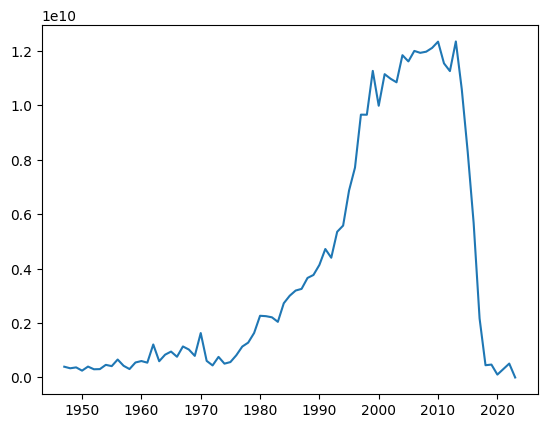

In [768]:
#Print out yearly adjusted budget
plot_rev = df.groupby(['release_year'])['adjusted_budget'].agg('sum')
plt.plot(plot_rev)

#### Note on Revenue and Budget Drop After 2013

The graphs above show a drop in yearly adjusted revenue and adjusted budget around 2013. This drop matches with a decrease in the number of movies in the dataset during the same period on the graph below. So, the drop in revenue and budget is likely due to having fewer movies in the dataset after 2013, not a real decrease in the movie industry revenue or budget.


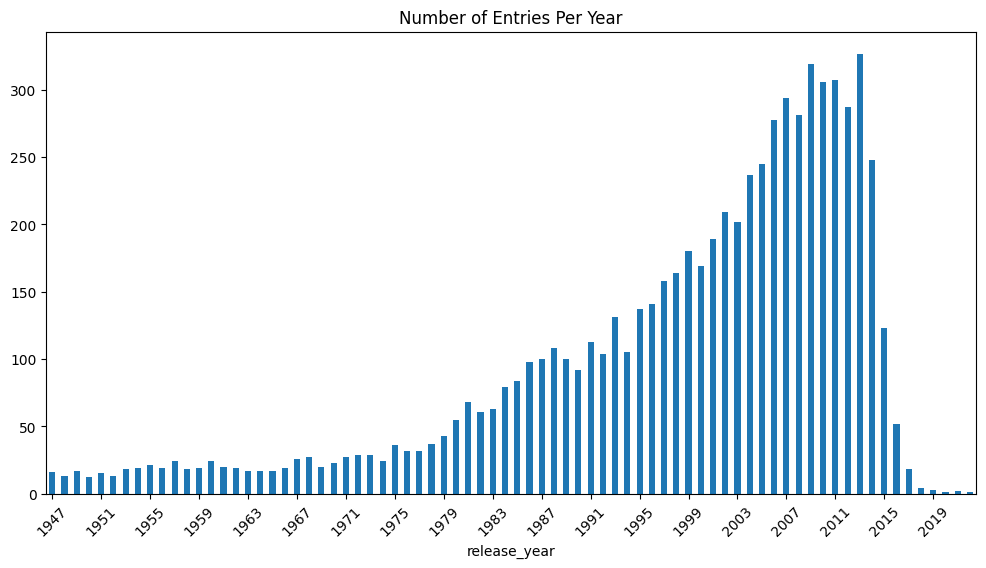

In [769]:
entries_per_year = df.groupby('release_year').size()
entries_per_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Entries Per Year')
plt.xticks(rotation=45) 
plt.locator_params(axis='x', nbins=20)
plt.show()


Formula ROI = (revenue - budget) / budget * 100%

In [770]:
df['adjusted_ROI'] = ((df['adjusted_revenue'] - df['adjusted_budget']) / df['adjusted_budget']) * 100


In [771]:
df[['adjusted_ROI']].describe().style

It's evident that the distribution of ROI (Return on Investment) is highly skewed with extreme outliers. This huge discrepancy between the maximum value and the 75th percentile, along with the large standard deviation, confirms the presence of extreme outliers in the data.

Let's look at what percentile our outliers lie and how many and what those movies are.

0.75      289.98
0.95     1350.00
0.99     6559.52
0.99    10839.32
1.00   414298.50
Name: adjusted_ROI, dtype: float64


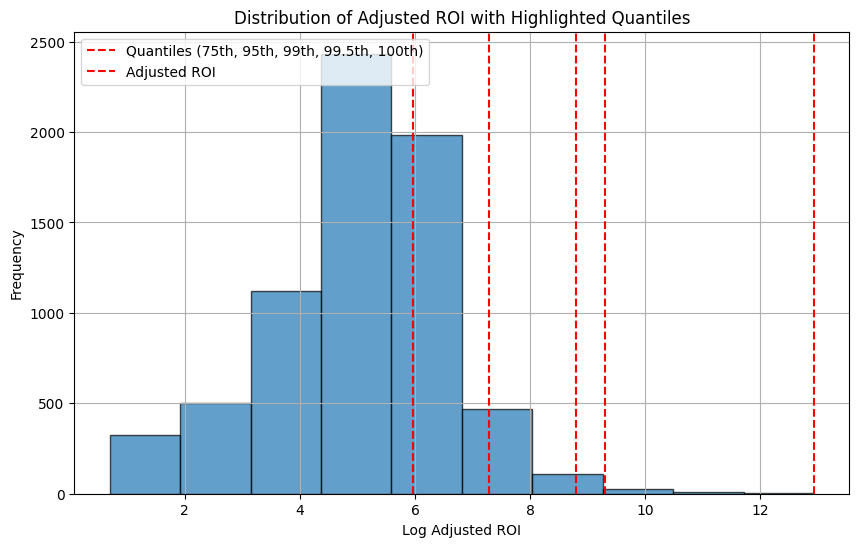

In [772]:
set_df = df.copy()
percentiles = df['adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])
print(percentiles)

# let's see quantiles on the graph, but first let's apply log adjusted_ROI for better visualization and analysis

# remove the negative numbers
set_df['log_adjusted_ROI'] = np.log1p(set_df['adjusted_ROI'] - set_df['adjusted_ROI'].min() + 1)
log_quantiles = set_df['log_adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(set_df['log_adjusted_ROI'], bins=10, edgecolor='k', alpha=0.7)
for quantile in log_quantiles:
    plt.axvline(x=quantile, color='red', linestyle='--')
plt.xlabel('Log Adjusted ROI')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted ROI with Highlighted Quantiles')
plt.legend(['Quantiles (75th, 95th, 99th, 99.5th, 100th)', 'Adjusted ROI'])
plt.grid(True)
plt.show()


So you can see that outliers from the right side is somewhere between 99.5% and 100%. Let's see the list of the most profitable movies

In [773]:
quantile_99 = set_df['adjusted_ROI'].quantile(0.995)
max_value = set_df['adjusted_ROI'].max()  # This corresponds to the 100th percentile

count_between = set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)].shape[0]

print(f'Number of values between 99th and 100th percentiles: {count_between}')

set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)][['title', "adjusted_ROI", "adjusted_budget", "adjusted_revenue"]].sort_values(by='adjusted_ROI', ascending=False)


Number of values between 99th and 100th percentiles: 35


title  adjusted_ROI  \
2099                          the blair witch project     414298.50   
4686                                      deep throat     399900.00   
1937                                 1 night in paris     178631.01   
5325                              paranormal activity      89832.93   
2607                                lady frankenstein      69741.50   
1961                            aloha, bobby and rose      58233.33   
581                                    pink flamingos      49900.00   
953                                        open water      41952.27   
3699                            behind the green door      41566.67   
3456                                         monopoly      37687.12   
998                      the texas chain saw massacre      36252.94   
2271                                          mad max      28471.43   
273                                       el mariachi      28148.03   
4712                                 the stewardesses      26900.00   
3015                         night of the living dead      26215.79   
4548                                     the mistress      26182.00   
2745                                            rocky      22425.04   
30    alice in wonderland: an x-rated musical fantasy      22400.00   
5273                                        halloween      21522.77   
3702                               the zombie diaries      21405.38   
337                             the way of the dragon      20669.23   
1938                                              joe      18125.71   
5064                                american graffiti      17918.02   
40                                  let's do it again      16757.14   
2663                      a polish vampire in burbank      16566.67   
3586                                      blood feast      16226.53   
535                                        easy rider      14900.00   
3316                        the legend of boggy creek      13650.00   
4677                                             once      12844.07   
4364                                napoleon dynamite      11429.52   
5990                                           clerks      11327.49   
5329                                     lady vampire      11011.11   
4410                         ...and god created woman      10900.00   
2289                                      keeping mum      10885.03   
4675                                           vixen!      10858.90   

      adjusted_budget  adjusted_revenue  
2099        109360.89      453189876.90  
4686        182158.87      728635491.61  
1937          8999.42       16084753.84  
5325        313242.65      281708294.19  
2607       1485775.06     1037687589.32  
1961        343970.94      200649716.98  
581          88069.86       44034927.54  
953         213625.37       89834320.23  
3699        428952.00      178730000.00  
3456          3670.22        1386868.56  
998         506401.67      184091900.00  
2271       1506293.91      430369688.39  
273          15558.12        4394863.03  
4712        825654.89      222926820.65  
3015        981242.89      258221813.03  
4548         29410.16        7729578.78  
2745       5229621.34     1177974309.71  
30         2081102.74      468248116.44  
5273       1471659.09      318213449.09  
3702         13995.65        3009816.74  
337         947226.14      196731582.73  
1938        827947.20      150899266.19  
5064       5246321.27      945283111.11  
40          387411.11       65306444.44  
2663          9042.89        1507147.82  
3586        242557.98       39601303.36  
535        3320666.67      498100000.00  
3316       1160252.03      159534653.94  
4677        236811.50       30653048.30  
4364        643390.15       74179823.77  
5990         56080.43        6408584.27  
5329         14453.32        1605924.95  
4410       3313424.21      364476663.03  
2289        259208.12       28474091.98  
4675        628339.75

I checked first 2 outliers - [The_Blair_Witch_Project](https://en.wikipedia.org/wiki/The_Blair_Witch_Project) and [Deep_Throat](https://en.wikipedia.org/wiki/Deep_Throat_(film)) and they indeed have very high ROI so they look legit.

Additionaly, I googled 'good ROI in movie industry' so I got different answers, but most of them were "3x its budget". This rule suggests that for a movie to be considered financially successful, it should earn at least three times its production budget. This is because the production budget often only accounts for the costs of filming. There are many other expenses, like marketing, distribution, and operational costs, that are also incurred during a movie's release.

If you look at ROI distribution you also might notice that ROI=300 is almost 75th percentile.

Here's how we'll label the ROI based on the "3x its budget" rule to indicate whether a movie is a hit or a flop:

- **ROI < 300% (or 3x its budget): Flop**

If a movie's ROI is less than 300%, it means the revenue generated didn't cover the production budget and the additional expenses to a satisfactory extent. It's a sign of financial underperformance, and hence, we label it as a 'flop'.

- **ROI ≥ 300% (or 3x its budget): Hit**

Conversely, if a movie's ROI is 300% or higher, it suggests that the revenue generated was substantial, covering the production budget and the additional expenses, with a healthy profit margin. Therefore, we label it as a 'hit'.
Labeling movies in this manner will help us, and any potential investors or stakeholders, quickly identify the financial performance of movies in our dataset

In [774]:
def categorize_roi(roi):
    if roi < 300:
        return 'flop'
    else:
        return 'hit'

df['ROI_category'] = df['adjusted_ROI'].apply(categorize_roi)

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_ROI_category'] = df['ROI_category'].map(label_mapping)

df.drop(['ROI_category', 'adjusted_boxoffice'], axis=1, inplace=True)

### Ratings

In [775]:
print(df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].info())
df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Index: 6985 entries, 0 to 7396
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tmdb_rating             6985 non-null   float64
 1   tmdb_vote_count         6985 non-null   int64  
 2   imdb_rating             6980 non-null   float64
 3   imdb_votes              6983 non-null   float64
 4   rotten_tomatoes_rating  5880 non-null   float64
 5   metacritic_rating       5223 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 382.0 KB
None


count     mean       std   min     25%      50%  \
tmdb_rating            6985.00    63.08      9.62  0.00   58.00    63.64   
tmdb_vote_count        6985.00  1682.75   3110.17  0.00  132.00   532.00   
imdb_rating            6980.00    63.58     10.72 13.00   57.00    64.00   
imdb_votes             6983.00 99106.58 193008.79  7.00 8490.50 32645.00   
rotten_tomatoes_rating 5880.00    56.01     28.01  0.00   32.00    59.00   
metacritic_rating      5223.00    55.26     18.26  1.00   42.00    56.00   

                             75%        max  
tmdb_rating                69.32     100.00  
tmdb_vote_count          1730.00   34612.00  
imdb_rating                71.00      93.00  
imdb_votes             104796.50 2802199.00  
rotten_tomatoes_rating     81.00     100.00  
metacritic_rating          68.00     100.00

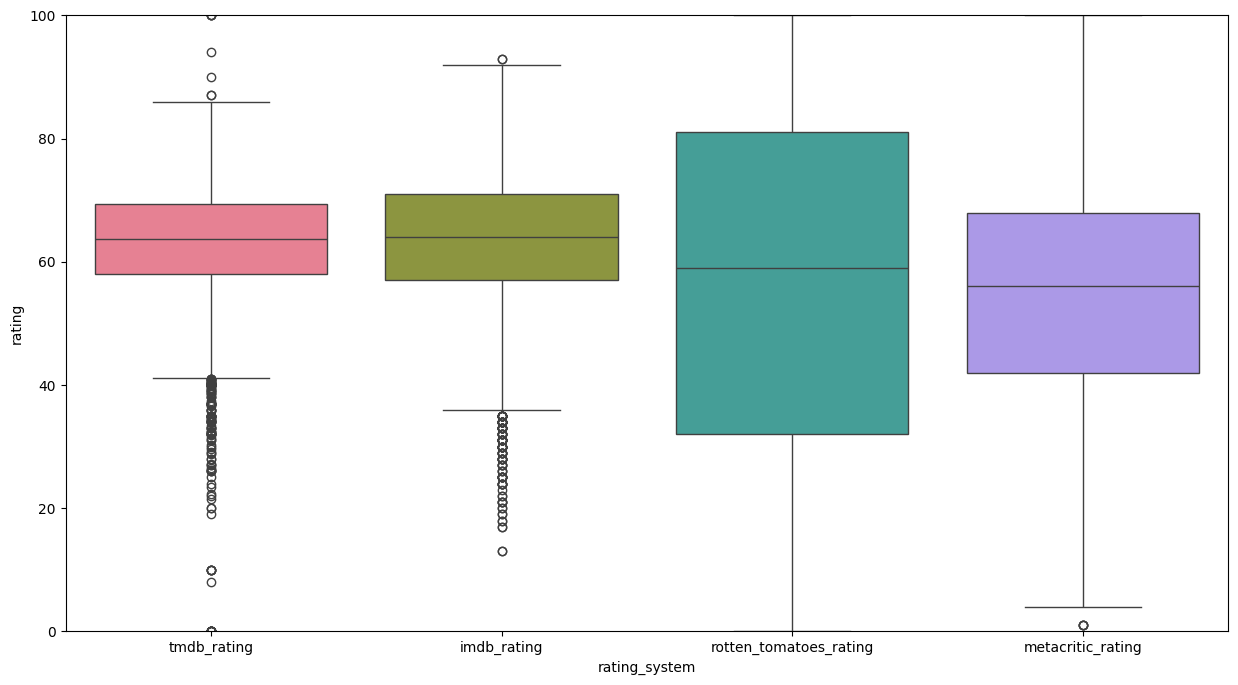

In [776]:
melted_df = df.melt(value_vars=['tmdb_rating', 'imdb_rating', 'rotten_tomatoes_rating', 'metacritic_rating'],
                    var_name='rating_system', value_name='rating')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.boxplot(x='rating_system', y='rating', data=melted_df, palette="husl", hue='rating_system', ax=ax)
ax.set_ylim([0, 100])  

plt.show()

In [777]:
zero_counts = (df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']] == 0).sum()

print(zero_counts)


tmdb_rating               13
tmdb_vote_count           13
imdb_rating                0
imdb_votes                 0
rotten_tomatoes_rating    75
metacritic_rating          0
dtype: int64


In our dataset, we have access to the number of votes a movie has received on both TMDB (tmdb_vote_count) and IMDb (imdb_votes). It's a well-observed phenomenon that the rating of a movie can significantly depend on the number of votes it has received; a movie with a higher number of votes is likely to have a more reliable rating as compared to a movie with fewer votes. This is because a larger voting pool reduces the chance of skewed ratings.

To account for this voting discrepancy and to provide a balanced view of a movie's rating, I will apply a Weighted Rating Formula. This formula not only considers the average rating of a movie but also the number of votes it has garnered. By doing so, it gives us a more conservative estimate of a movie’s rating, particularly when the movie has fewer votes. This weighted rating thus corrects the bias in rating due to a varied number of votes, offering a more accurate reflection of a movie's popularity and quality. 

**Adjusting Ratings based on Vote Counts:**

A weighted rating formula is often used to compute a score that reflects both the average rating of an item and the number of ratings the item has received. This helps to give a more balanced view of the item's popularity and quality, compared to simply using the average rating which can be easily skewed by a small number of high or low ratings.

One common formula used for this purpose is the IMDb (Internet Movie Database) weighted rating formula, which is as follows:

Weighted Rating(WR) = (v/(v+m))*R + (m/(v+m)) * C
where:

- v is the number of votes for the item,
- m is the minimum number of votes required for the item to be listed,
- R is the average rating of the item,
- C is the mean rating across the whole dataset.

the 70th percentile (0.70 quantile) is used to set a threshold for the minimum number of votes a movie must have to be included in the weighted rating calculation. This means that only movies with a number of votes higher than 70% of the movies in the dataset will have a weighted rating significantly influenced by their own average rating. For movies with a number of votes below this threshold, the global average rating will have a more significant influence on their weighted rating.

In [778]:
m = df['tmdb_vote_count'].quantile(0.70)  # minimum votes required to be listed
C = df['tmdb_rating'].mean()  # mean rating across the whole dataset

print('tmdb minimum votes:', m)
print('tmdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['tmdb_vote_count']
    R = x['tmdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_tmdb_rating'] = df.apply(weighted_rating, axis=1)

m = df['imdb_votes'].quantile(0.70)  # minimum votes required to be listed
C = df['imdb_rating'].mean()  # mean rating across the whole dataset

print('imdb minimum votes:', m)
print('imdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['imdb_votes']
    R = x['imdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_imdb_rating'] = df.apply(weighted_rating, axis=1)

df[['imdb_rating', 'imdb_votes', 'weighted_tmdb_rating',  'tmdb_vote_count',  'tmdb_rating','weighted_imdb_rating', 'rotten_tomatoes_rating',	'metacritic_rating']].describe().style


tmdb minimum votes: 1367.0
tmdb mean rating across the whole dataset: 63.08269148174659
imdb minimum votes: 82614.4
imdb mean rating across the whole dataset: 63.57808022922636


The weighted rating formula helps in balancing the ratings, especially for movies with a lower number of votes. Movies with fewer votes are pulled towards the mean rating to a greater extent than movies with a higher number of votes. This reduces the likelihood of extreme ratings for movies with few votes, making the distribution of ratings more balanced and less skewed. Movies with a higher vote count have ratings that are more reflective of the general audience's opinion, and their weighted ratings are less affected by the formula. 

By regressing ratings towards the mean, the formula reduces the influence of outlier ratings. This is particularly useful when there are movies with very high or very low ratings but with a small number of votes, which could otherwise distort the overall distribution.

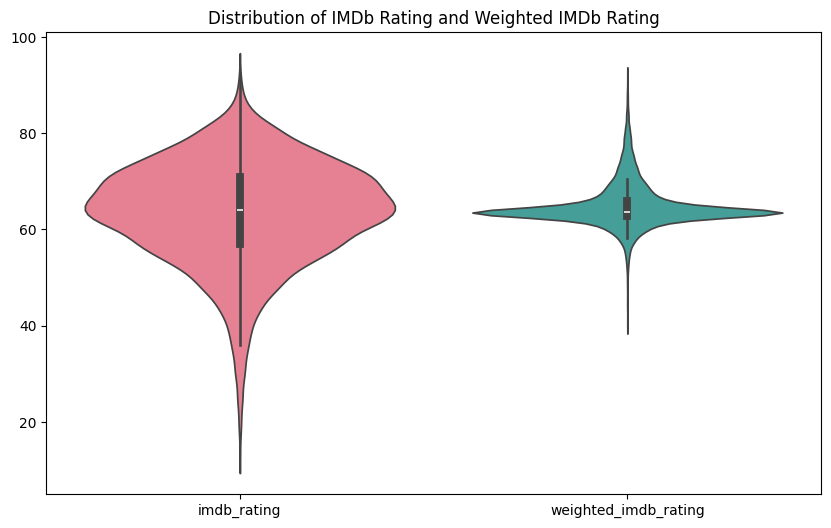

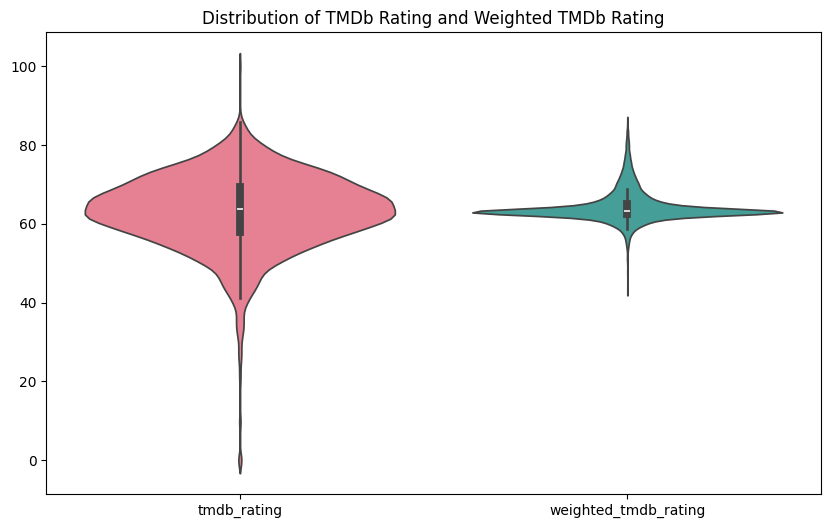

In [779]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['imdb_rating', 'weighted_imdb_rating']], palette="husl")
plt.title('Distribution of IMDb Rating and Weighted IMDb Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['tmdb_rating', 'weighted_tmdb_rating']], palette="husl")
plt.title('Distribution of TMDb Rating and Weighted TMDb Rating')
plt.show()


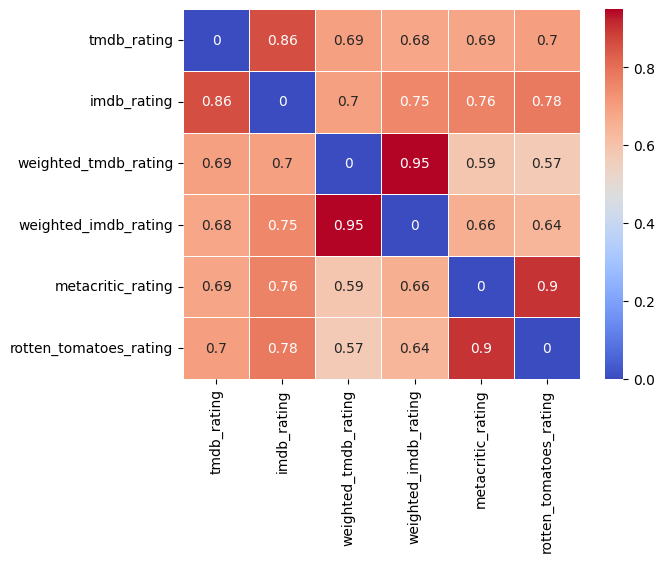

('weighted_tmdb_rating', 'weighted_imdb_rating')


In [780]:
corr_matrix = df[[ "tmdb_rating", 'imdb_rating', 
                             "weighted_tmdb_rating", 'weighted_imdb_rating', 
                             'metacritic_rating', 'rotten_tomatoes_rating']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , linewidth=.5)

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)


The correlation coefficient of 0.96 between normalized_weighted_tmdb_rating and normalized_weighted_imdb_rating indicates a very strong positive linear relationship between these two variables. It makes sense to average them separately as they might be capturing similar aspects of the movie's quality.

Also in cases where weighted_imdb_rating is null, we can take only weighted_tmdb_rating number instead

In [781]:
df['average_rating'] = np.where(df['weighted_imdb_rating'].isnull(), 
                                df['weighted_tmdb_rating'], 
                                (df['weighted_tmdb_rating'] + df['weighted_imdb_rating']) / 2)


# let's look at the top rates movies
top_movies = df.sort_values(by='average_rating', ascending=False)
top_movies[['title', 'average_rating']].head(15)


title  average_rating
4852                           the shawshank redemption           88.97
4827                                      the godfather           88.15
6492                                    the dark knight           86.71
6474      the lord of the rings: the return of the king           86.20
4115                                   schindler's list           86.17
4829                              the godfather part ii           85.95
574                                        pulp fiction           85.92
915                                        forrest gump           85.39
2497                                         fight club           85.25
3519                                          inception           85.04
6472  the lord of the rings: the fellowship of the ring           84.94
5711                                       12 angry men           84.82
6473              the lord of the rings: the two towers           84.71
6769                                       interstellar           84.71
4149                                     the green mile           84.03

I'm not going to use metacritic and rotten tomatoes rating in this analysis. It's possible to fill the missing data in those ratings by mean for example, but it still demands to include those 2 ratings into the raiting formula metric which will increase complexity.

Currently for simplicity we aim to categorize movies into 'hit' or 'flop' based on their average ratings.
I chose a simplistic approach to label the top 25% of movies (in terms of average_rating) as 'hit', while the remaining 75% are labeled as 'flop'. This is a straightforward method to distinguish higher-rated movies from the lower-rated ones.

In [782]:
df['rating_category'] = 'flop' 
top_25_percentile_threshold = df['average_rating'].quantile(0.75)  
df.loc[df['average_rating'] >= top_25_percentile_threshold, 'rating_category'] = 'hit'  

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_rating_category'] = df['rating_category'].map(label_mapping)
df.drop(['rating_category', 
                             'rotten_tomatoes_rating', 'metacritic_rating', 'imdb_rating', 'tmdb_rating',  
                             'weighted_imdb_rating', 'weighted_tmdb_rating', 'tmdb_vote_count', 'imdb_votes'], axis=1, inplace=True)


### Awards

In [783]:
df[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']].describe()

oscar_won  oscar_nominated  bafta_won  bafta_nominated  awards_won  \
count    6985.00          6985.00    6985.00          6985.00     6985.00   
mean        0.15             0.23       0.01             0.03        5.80   
std         0.74             0.82       0.10             0.21       14.74   
min         0.00             0.00       0.00             0.00        0.00   
25%         0.00             0.00       0.00             0.00        0.00   
50%         0.00             0.00       0.00             0.00        1.00   
75%         0.00             0.00       0.00             0.00        5.00   
max        11.00            11.00       4.00             5.00      245.00   

       awards_nominated  
count           6985.00  
mean              10.84  
std               22.34  
min                0.00  
25%                1.00  
50%                4.00  
75%               11.00  
max              337.00

In [784]:
# Top 10 movies by oscar_won
top10_oscar_won = df.nlargest(10, 'oscar_won')

# Top 10 movies by bafta_won
top10_bafta_won = df.nlargest(10, 'bafta_won')

# Top 10 movies by awards_won
top10_awards_won = df.nlargest(10, 'awards_won')

print("Top 10 movies by Oscar wins:")
print(top10_oscar_won[['title', 'oscar_won']])

print("\nTop 10 movies by BAFTA wins:")
print(top10_bafta_won[['title', 'bafta_won']])

print("\nTop 10 movies by Total awards won:")
print(top10_awards_won[['title', 'awards_won']])


Top 10 movies by Oscar wins:
                                              title  oscar_won
562                                         ben-hur         11
2532                                        titanic         11
6474  the lord of the rings: the return of the king         11
1355                                west side story         10
3279                                           gigi          9
3632                               the last emperor          9
4109                            the english patient          9
555                               on the waterfront          8
1682                                   my fair lady          8
1806                          from here to eternity          8

Top 10 movies by BAFTA wins:
                                        title  bafta_won
4692                         a bridge too far          4
3056                        strictly ballroom          3
83                       pink floyd: the wall          2
1120                

I referred to this link to gather some additional info on movie awards: https://www.imdb.com/title/<IMDB_ID>/awards/. The columns awards_won and awards_nominated obviously represent the total count of all awards won and nominated respectively.

For instance, if we consider 'The Lord of the Rings: The Return of the King' (link) or 'Titanic' (link), it's evident from the dataset that only the Oscars are mentioned. However, there's no mention of BAFTA awards, which might suggest that the dataset primarily highlights the most prestigious award(s) a movie has received.

Let's check my theory if we have for any movie oscar and bafta together:

In [785]:

titles_of_interest = ['titanic', 'the lord of the rings: the return of the king']
filtered_rows = df[df['title'].isin(titles_of_interest)]
print(filtered_rows[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']])

non_empty_awards_rows = df[(df['oscar_won'].notnull() & df['oscar_won'] > 0) & (df['bafta_won'].notnull() & df['bafta_won'] > 0)]
print(non_empty_awards_rows)

      oscar_won  oscar_nominated  bafta_won  bafta_nominated  awards_won  \
1206          1                0          0                0           1   
2532         11                0          0                0         126   
6474         11                0          0                0         215   

      awards_nominated  
1206                 3  
2532                83  
6474               124  
Empty DataFrame
Columns: [title, release_year, release_month, original_language, spoken_languages, genres, production_companies, production_countries, runtime, rated, tagline, overview, plot, tmdb_popularity, cast, crew, belongs_to_collection.name, oscar_won, oscar_nominated, bafta_won, bafta_nominated, awards_won, awards_nominated, adjusted_budget, adjusted_revenue, adjusted_ROI, numerical_ROI_category, average_rating, numerical_rating_category]
Index: []

[0 rows x 29 columns]


We can create a Points System to combine these awards into one score. We'll give more points for winning awards and some extra points for nominations. Oscars will get the highest points, followed by BAFTA, and then other awards. We'll also take out the BAFTA and Oscar counts from the total awards number.

Points:

Oscar Win: 5 points
Oscar Nomination: 3 points
BAFTA Win: 4 points
BAFTA Nomination: 2 points
Other Award Win: 3 points
Other Award Nomination: 1 point"

In [786]:
df['award_points'] = (df['oscar_won'] * 5 + df['oscar_nominated'] * 3 +
                      df['bafta_won'] * 4 + df['bafta_nominated'] * 2 +
                      (df['awards_won'] - df['oscar_won'] - df['bafta_won']) * 3 + 
                      (df['awards_nominated'] - df['oscar_nominated'] - df['bafta_nominated']) * 1)

df[['award_points', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']]

award_points  oscar_won  oscar_nominated  bafta_won  bafta_nominated  \
0                0          0                0          0                0   
1                0          0                0          0                0   
2               43          4                0          0                0   
4                3          0                0          0                0   
5                3          0                0          0                0   
...            ...        ...              ...        ...              ...   
7392             9          0                0          0                0   
7393             4          0                0          0                0   
7394             4          0                0          0                0   
7395           224          1                0          0                0   
7396             0          0                0          0                0   

      awards_won  awards_nominated  
0              0                 0  
1              0                 0  
2              9                 8  
4              0                 3  
5              0                 3  
...          ...               ...  
7392           2                 3  
7393           0                 4  
7394           0                 4  
7395          49                75  
7396           0                 0  

[6985 rows x 7 columns]

count   6985.00
mean      29.03
std       65.14
min        0.00
25%        2.00
50%        8.00
75%       27.00
max     1069.00
Name: award_points, dtype: float64


/var/folders/_g/dcc1mh151c37cqym56jdsb0w0000gn/T/ipykernel_39593/1283950992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['award_points'], palette="husl")


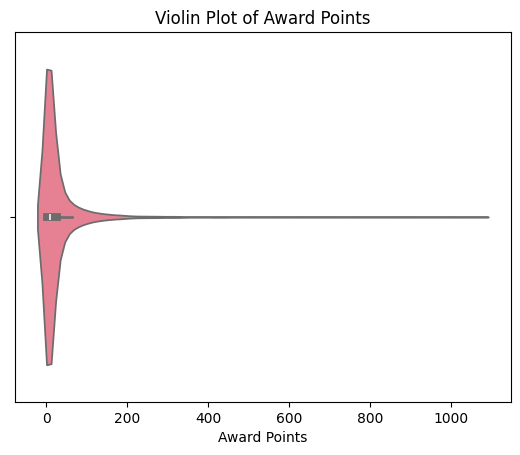

In [787]:
print(df['award_points'].describe())
sns.violinplot(x=df['award_points'], palette="husl")
plt.title('Violin Plot of Award Points')
plt.xlabel('Award Points')
plt.show()


the top 25% of the movies based on award points are labeled as 'hit' while the rest are labeled as 'flop'. This threshold is chosen to maintain consistency with the methodology applied to other metrics like ROI and average ratings. 

In [788]:
# Determine the 75th percentile value
threshold = df['award_points'].quantile(0.75)

df['award_category'] = ['hit' if x >= threshold else 'flop' for x in df['award_points']]

print(df[['award_points', 'award_category']].head())

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_award_category'] = df['award_category'].map(label_mapping)
df.drop(['award_category', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated'], axis=1, inplace=True)


   award_points award_category
0             0           flop
1             0           flop
2            43            hit
4             3           flop
5             3           flop


### Metrics correlation

Let's look at our metrics correlation

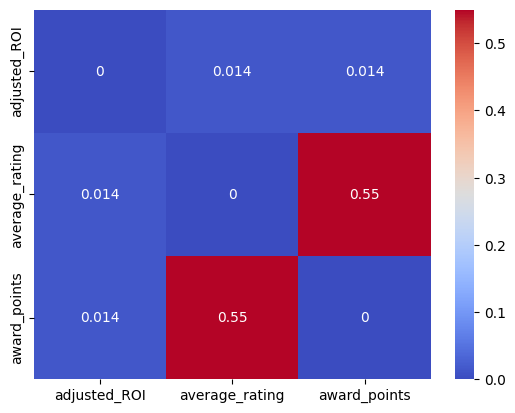

('average_rating', 'award_points')


In [789]:
corr_matrix = df[[ "adjusted_ROI", 'average_rating', 
                             "award_points"]].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)
# !TODO: write about connection between labels that we should use model that catch this correlation

The correlation number between 'average_rating' and 'award_points' shows that there is a somewhat strong link between the average rating of a movie and the award points it gets. Basically, if a movie has a higher rating, it's somewhat more likely to have more award points too. This makes sense because good movies are often liked by viewers and also get awards.

But, a 0.55 number isn't super strong, so there are probably other things affecting award points that we're not seeing here. And just because two things are linked doesn't mean one causes the other.

there's pretty much no relationship between a movie's Return on Investment (ROI) and its average rating or award points. In other words, just because a movie makes more money (has a higher ROI), it doesn’t mean people will rate it higher or that it will win more awards. And vice versa, a well-rated movie or a movie with lots of awards doesn’t necessarily make more money.

The idea here is that a movie can be successful in many ways - it could make a lot of money, people could love it, or it could win a lot of awards. Our numbers are helping us see these different kinds of success and how they relate to each other.

Let's find the most successful movies in each category:

In [790]:
# Top 10 movies by adjusted_ROI
top10_ROI = df.nlargest(10, 'adjusted_ROI')

# Top 10 movies by average_rating
top10_rating = df.nlargest(10, 'average_rating')

# Top 10 movies by award_points
top10_awards_won = df.nlargest(10, 'award_points')

# To display the top 10 lists
print("Top 10 movies by ROI metric:")
print(top10_ROI[['title', 'adjusted_ROI']])

print("\nTop 10 movies by rating matric:")
print(top10_rating[['title', 'average_rating']])

print("\nTop 10 movies by award metric:")
print(top10_awards_won[['title', 'award_points']])


Top 10 movies by ROI metric:
                        title  adjusted_ROI
2099  the blair witch project     414298.50
4686              deep throat     399900.00
1937         1 night in paris     178631.01
5325      paranormal activity      89832.93
2607        lady frankenstein      69741.50
1961    aloha, bobby and rose      58233.33
581            pink flamingos      49900.00
953                open water      41952.27
3699    behind the green door      41566.67
3456                 monopoly      37687.12

Top 10 movies by rating matric:
                                              title  average_rating
4852                       the shawshank redemption           88.97
4827                                  the godfather           88.15
6492                                the dark knight           86.71
6474  the lord of the rings: the return of the king           86.20
4115                               schindler's list           86.17
4829                          the godfather pa

In [791]:
# Anti Top 10 movies by adjusted_ROI
top10_ROI = df.nsmallest(10, 'adjusted_ROI')

# Anti Top 10 movies by average_rating
top10_rating = df.nsmallest(10, 'average_rating')

# To display the top 10 lists
print("Anti Top 10 movies by ROI metric:")
print(top10_ROI[['title', 'adjusted_ROI']])

print("\n Anti Top 10 movies by rating matric:")
print(top10_rating[['title', 'average_rating']])


Anti Top 10 movies by ROI metric:
                                           title  adjusted_ROI
6709                                   java heat        -99.99
5949                               the samaritan        -99.98
6940  the adventurer: the curse of the midas box        -99.97
6565                             the guillotines        -99.96
4539                        the velocity of gary        -99.95
6111                  philadelphia experiment ii        -99.94
1488                                   fishtales        -99.93
3983                             the good doctor        -99.91
146                                      absolon        -99.91
3713                             janky promoters        -99.91

 Anti Top 10 movies by rating matric:
                     title  average_rating
4221  dragonball evolution           44.00
4187        disaster movie           45.15
5126            epic movie           45.95
4112        batman & robin           45.96
5746     meet the s

### Features

#### Collection

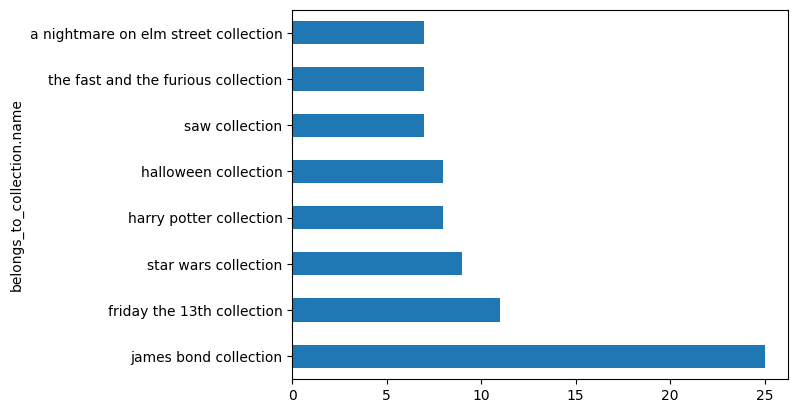

In [792]:
df['belongs_to_collection.name'].value_counts()
df['belongs_to_collection.name'].value_counts().head(8).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

df['collection'] = df['belongs_to_collection.name'].notna()

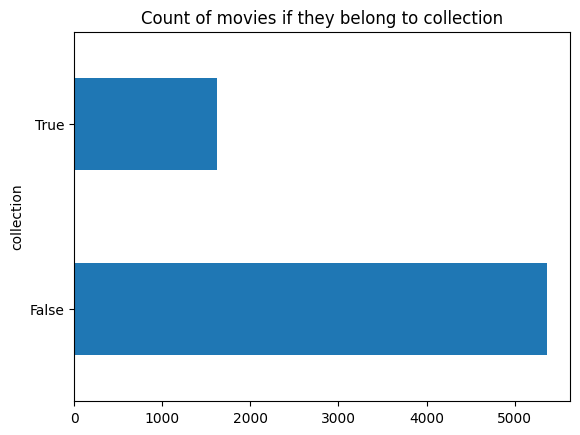

In [793]:
df['collection'].value_counts()
df['collection'].value_counts().plot(kind='barh')
plt.title('Count of movies if they belong to collection')

plt.show()

I need to shift data in adjusted_ROI for building boxplots, because it has negative values. Also we will add 1 in np.log(df["award_points"] + 1) to avoid dividing on zero

In [794]:
# Find the minimum value in the adjusted_ROI column
min_value = df['adjusted_ROI'].min()

# If the minimum value is negative, shift all the data by adding the absolute 
# value of the minimum value plus a small constant (e.g., 1)
if min_value < 0:
    shift_constant = abs(min_value) + 1 
    df['shifted_ROI'] = df['adjusted_ROI'] + shift_constant
else:
    df['shifted_ROI'] = df['adjusted_ROI']

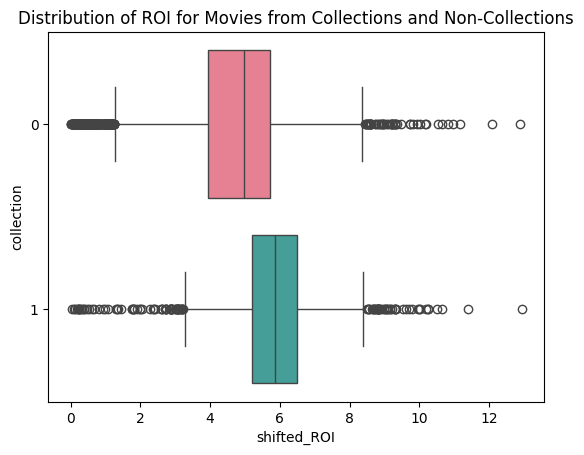

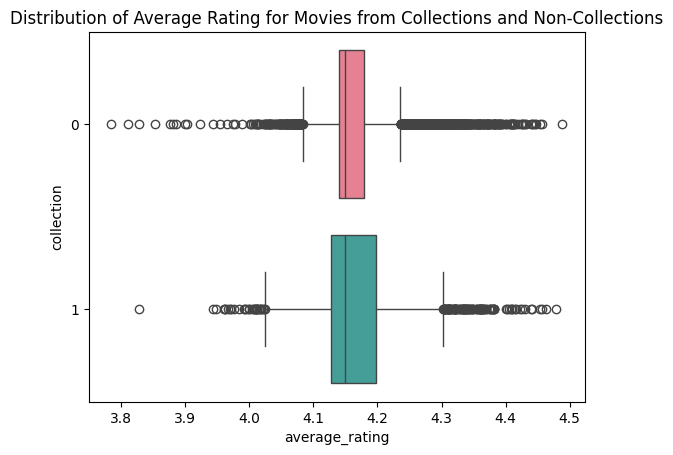

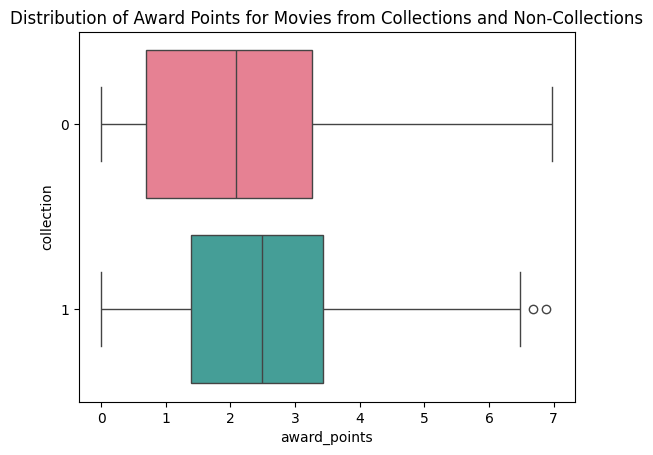

In [795]:
isCollection_string = df['collection'].apply(lambda x: "1" if x==1 else "0")

ax = sns.boxplot(x=np.log(df['shifted_ROI']), y=isCollection_string, palette="husl", hue=isCollection_string)
plt.title('Distribution of ROI for Movies from Collections and Non-Collections')
plt.show()

ax = sns.boxplot(x=np.log(df["average_rating"]), y=isCollection_string, palette="husl", hue=isCollection_string)
plt.title('Distribution of Average Rating for Movies from Collections and Non-Collections')
plt.show()

ax = sns.boxplot(x=np.log(df["award_points"] + 1), y=isCollection_string, palette="husl", hue=isCollection_string)
plt.title('Distribution of Award Points for Movies from Collections and Non-Collections')
plt.show()

#### Runtime

/var/folders/_g/dcc1mh151c37cqym56jdsb0w0000gn/T/ipykernel_39593/2525265114.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['runtime'], bins=30, kde=False, palette="husl")  # You can change the number of bins as needed


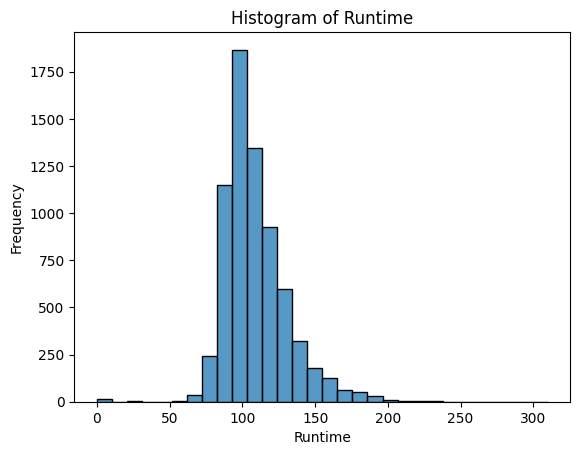

In [796]:


sns.histplot(df['runtime'], bins=30, kde=False, palette="husl")  # You can change the number of bins as needed
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime')
plt.show()

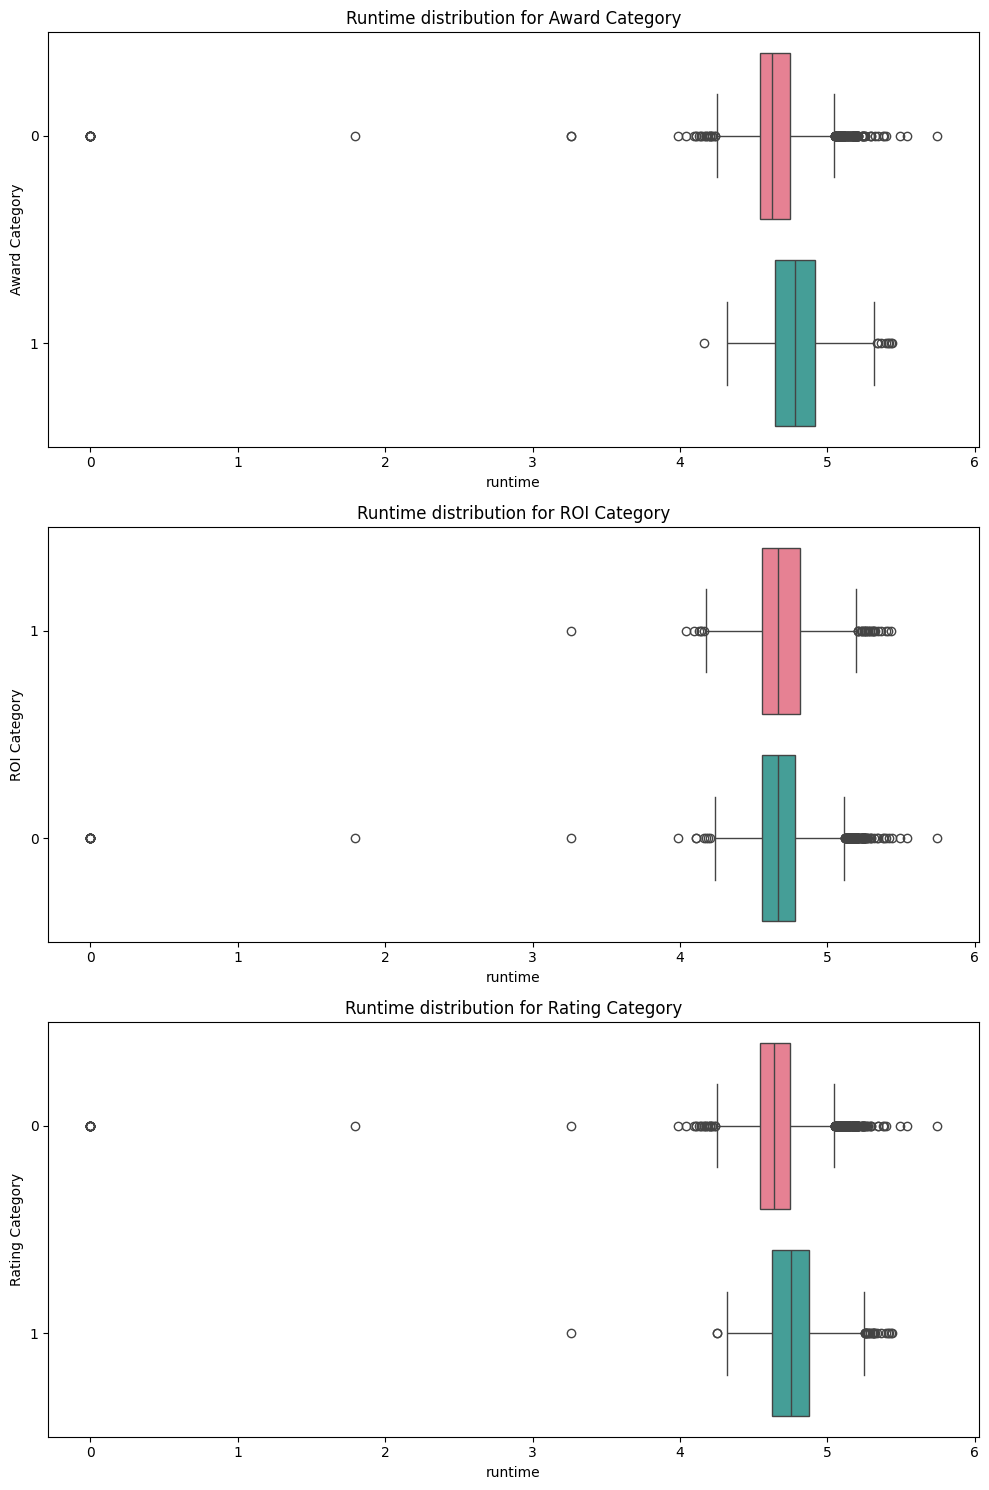

In [797]:
award_string = df['numerical_award_category'].apply(lambda x: "1" if x==1 else "0")
ROI_string = df['numerical_ROI_category'].apply(lambda x: "1" if x==1 else "0")
rating_string = df['numerical_rating_category'].apply(lambda x: "1" if x==1 else "0")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting the first boxplot for numerical_award_category
sns.boxplot(x=np.log(df["runtime"] + 1), y=award_string, ax=axs[0], palette="husl", hue=award_string)
axs[0].set_title('Runtime distribution for Award Category')
axs[0].set_ylabel('Award Category')

# Plotting the second boxplot for numerical_ROI_category
sns.boxplot(x=np.log(df["runtime"] + 1), y=ROI_string, ax=axs[1], palette="husl", hue=ROI_string)
axs[1].set_title('Runtime distribution for ROI Category')
axs[1].set_ylabel('ROI Category')

# Plotting the third boxplot for numerical_rating_category
sns.boxplot(x=np.log(df["runtime"] + 1), y=rating_string, ax=axs[2], palette="husl", hue=rating_string)
axs[2].set_title('Runtime distribution for Rating Category')
axs[2].set_ylabel('Rating Category')

plt.tight_layout()  # Adjusts the layout to prevent overlapping
plt.show()


#### Original language

The most popular movie original language in the dataset is english.

The ratio of English to non-English movies is: 82.61%


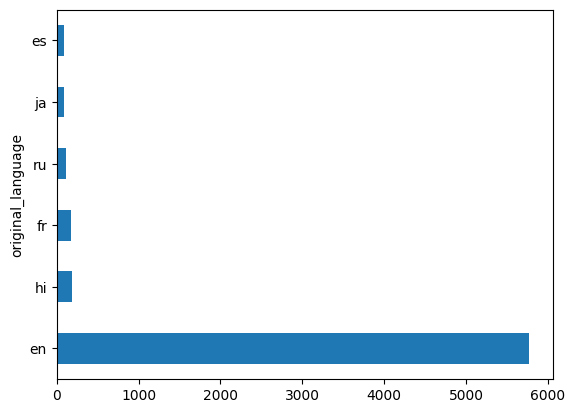

In [798]:
english_others_ratio = (len(df[df['original_language'] =='en']) / len(df)) * 100
print(f"The ratio of English to non-English movies is: {english_others_ratio:.2f}%")

df['original_language'].value_counts().head(6).plot(kind='barh')
plt.show()

In [799]:
df[df['adjusted_ROI'] == 0][['title', 'adjusted_revenue', "adjusted_budget", "adjusted_ROI"]]


Empty DataFrame
Columns: [title, adjusted_revenue, adjusted_budget, adjusted_ROI]
Index: []

Let's compare success metrics for non-english and english movies

is_english
1    5770
0    1215
Name: count, dtype: int64


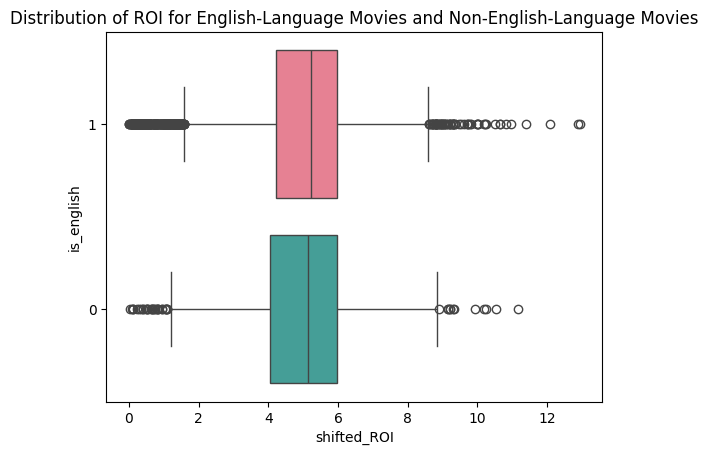

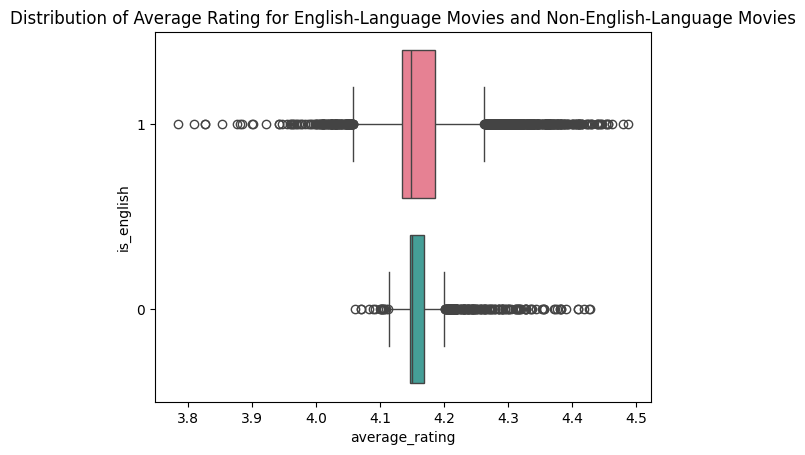

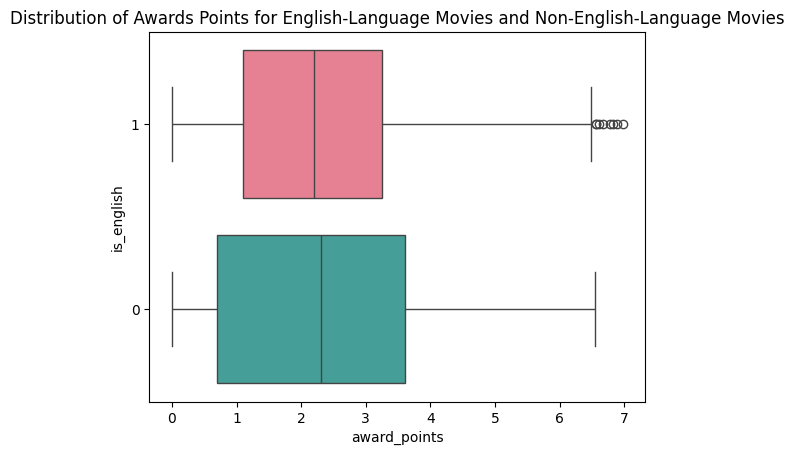

In [800]:
df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
print(df['is_english'].value_counts())

is_english_string = df['is_english'].apply(lambda x: "1" if x==1 else "0")

ax = sns.boxplot(x=np.log(df['shifted_ROI']), y=is_english_string, palette="husl", hue=is_english_string)
plt.title('Distribution of ROI for English-Language Movies and Non-English-Language Movies')
plt.show()

ax = sns.boxplot(x=np.log(df["average_rating"]), y=is_english_string, palette="husl", hue=is_english_string)
plt.title('Distribution of Average Rating for English-Language Movies and Non-English-Language Movies')
plt.show()

ax = sns.boxplot(x=np.log(df["award_points"] + 1), y=is_english_string, palette="husl", hue=is_english_string)
plt.title('Distribution of Awards Points for English-Language Movies and Non-English-Language Movies')
plt.show()

**ROI**

Both English and non-English movies have a wide range of ROI values, as evidenced by the large standard deviations and the vast difference between the minimum and maximum values. The median ROI is higher for English movies compared to non-English movies, suggesting that the typical English movie has a higher ROI.

**Average Rating**

Non-English movies have a slightly higher mean and median rating compared to English movies. The range of ratings is broader for English movies. The median rating is also higher for non-English movies, indicating that non-English movies tend to receive slightly higher ratings on average.

**Award Points**

Non-English movies are associated with a bit higher mean and median number of award points, indicating a possible higher level of award recognition for non-English movies in this dataset.

#### Title, overview, tagline and plot

For those features I'm going to use TfidfVectorizer with decomposition and sentiment analysis:

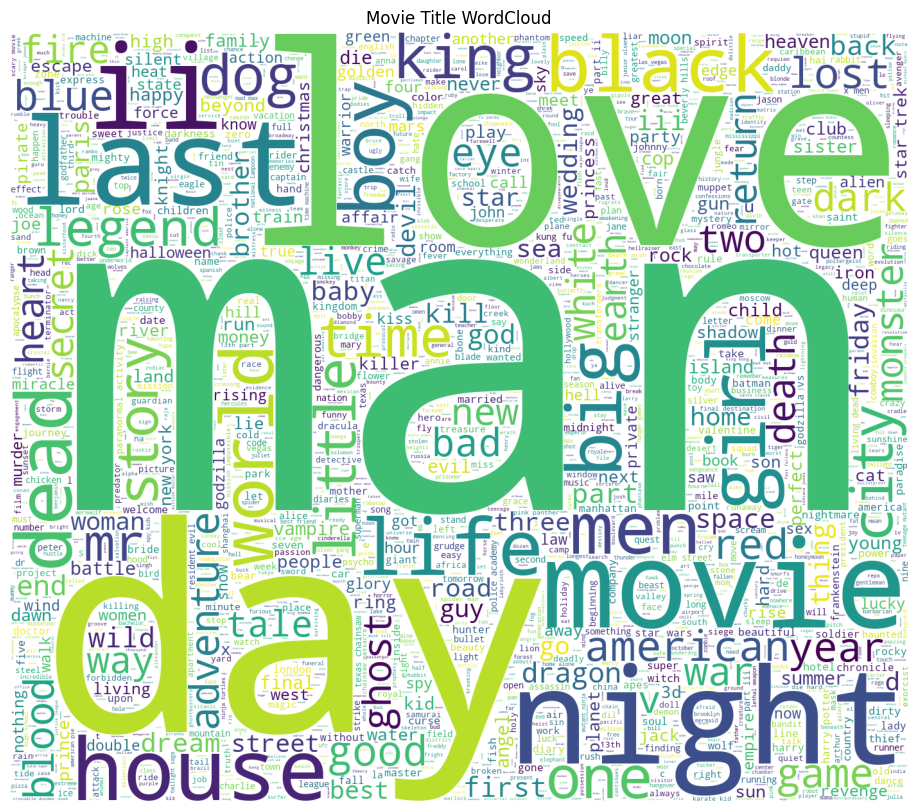

In [801]:
text = ' '.join(df['title'].astype(str))
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          max_words=10000,
                          width=1400,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Movie Title WordCloud')
plt.axis('off')
plt.show()

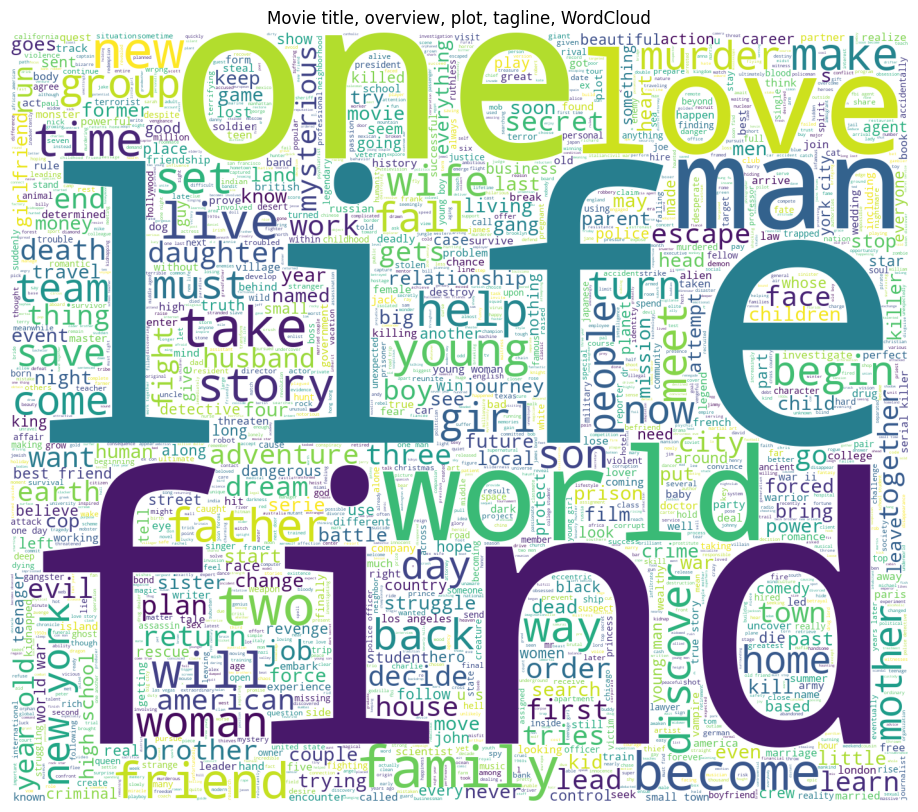

In [802]:
text_columns = ['title', 'overview', 'plot', 'tagline']
text_data= df[text_columns].apply(lambda x: ' '.join(x), axis=1) 

text = ' '.join(text_data.astype(str))
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          max_words=10000,
                          width=1400,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Movie title, overview, plot, tagline, WordCloud')
plt.axis('off')
plt.show()

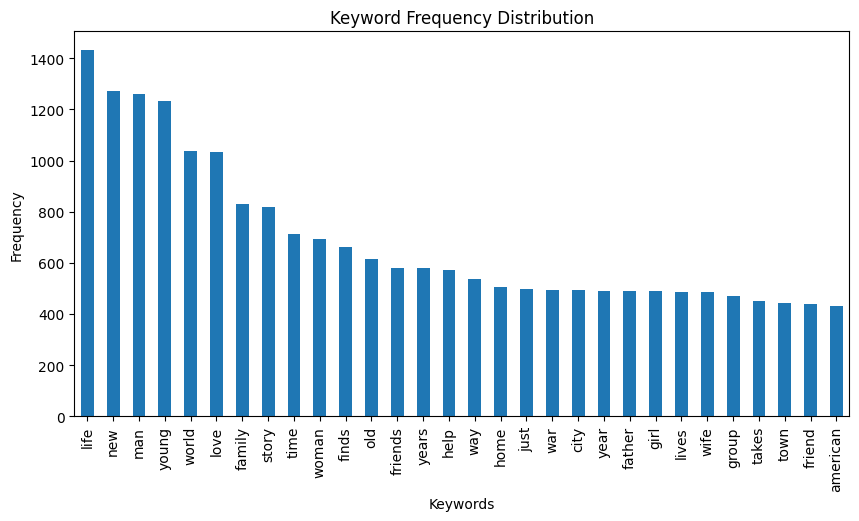

In [803]:

vectorizer = TfidfVectorizer(max_features=300, stop_words='english')  # Create a TF-IDF vectorizer, extracting top 100 keywords
tfidf_matrix = vectorizer.fit_transform(text_data)  # Fit and transform the text data

keywords = vectorizer.get_feature_names_out()  # Get the keywords
binary_features = (tfidf_matrix > 0).astype(int)  # Convert TF-IDF values to binary values (1 if TF-IDF value > 0, else 0)

binary_features_df = pd.DataFrame(binary_features.toarray(), columns=keywords)  # Convert to DataFrame
keyword_frequencies = binary_features_df.sum(axis=0)  # Sum each column to get keyword frequencies

# Plotting
keyword_frequencies.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(10, 5))
plt.title('Keyword Frequency Distribution')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

svd = TruncatedSVD(n_components=1)
# Reduce dimensionality
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)
df['text'] = reduced_tfidf_matrix

In [804]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tagline', 'overview',
       'plot', 'tmdb_popularity', 'cast', 'crew', 'belongs_to_collection.name',
       'adjusted_budget', 'adjusted_revenue', 'adjusted_ROI',
       'numerical_ROI_category', 'average_rating', 'numerical_rating_category',
       'award_points', 'numerical_award_category', 'collection', 'shifted_ROI',
       'is_english', 'text'],
      dtype='object')

Stopwords are common words that are often filtered out in the preprocessing step in text analysis to reduce dimensionality and noise. However, they can sometimes carry sentiment (e.g., "not" in "not good"). Removing stopwords can potentially alter the original sentiment of the text. TextBlob library you are using in your code snippet does not require explicit stopword removal as

In [805]:
from textblob import TextBlob
df['overview_sentiment'] = df['overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tagline_sentiment'] = df['tagline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['plot_sentiment'] = df['plot'].apply(lambda x: TextBlob(x).sentiment.polarity)

df = df.drop(['overview', 'tagline', 'plot'], axis=1)

Most of the data in title_sentiment and tagline_sentiment is showing as "neutral", it means these features might not be very helpful for our model. This is because they don't change much from one movie to another - they are mostly the same value, "neutral".

When a feature is mostly the same value, it can't help our model learn differences between movies, so it might not be worth including these features

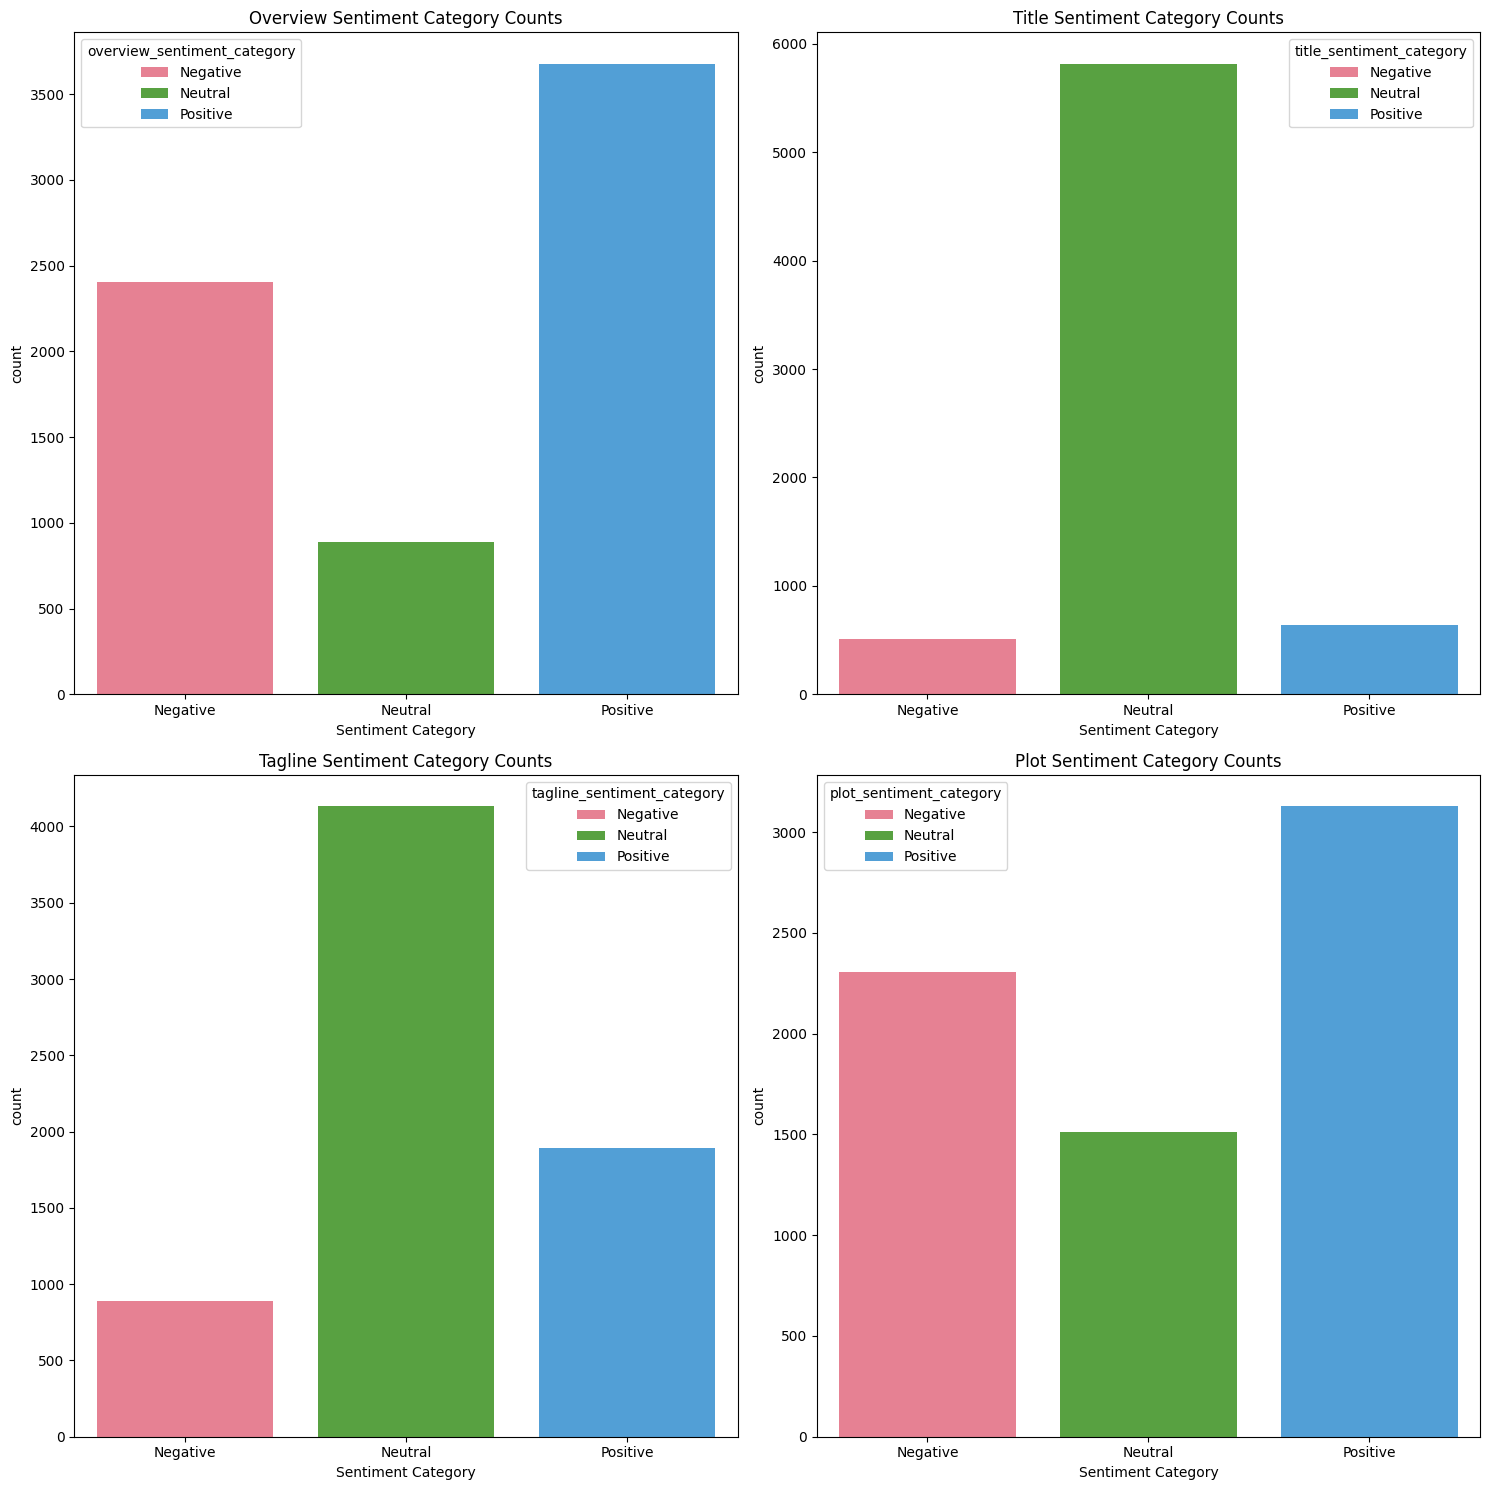

In [806]:
bins = [-1, -0.01, 0.01, 1]
labels = ['Negative', 'Neutral', 'Positive']

for col in ['overview_sentiment', 'title_sentiment', 'tagline_sentiment', 'plot_sentiment']:
    df[f'{col}_category'] = pd.cut(df[col], bins=bins, labels=labels)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(x=df['overview_sentiment_category'], ax=axs[0, 0], palette="husl", hue=df['overview_sentiment_category'])
axs[0, 0].set_title('Overview Sentiment Category Counts')
axs[0, 0].set_xlabel('Sentiment Category')

sns.countplot(x=df['title_sentiment_category'], ax=axs[0, 1], palette="husl", hue=df['title_sentiment_category'])
axs[0, 1].set_title('Title Sentiment Category Counts')
axs[0, 1].set_xlabel('Sentiment Category')

sns.countplot(x=df['tagline_sentiment_category'], ax=axs[1, 0], palette="husl", hue=df['tagline_sentiment_category'])
axs[1, 0].set_title('Tagline Sentiment Category Counts')
axs[1, 0].set_xlabel('Sentiment Category')

sns.countplot(x=df['plot_sentiment_category'], ax=axs[1, 1], palette="husl", hue=df['plot_sentiment_category'])
axs[1, 1].set_title('Plot Sentiment Category Counts')
axs[1, 1].set_xlabel('Sentiment Category')

plt.tight_layout()  # Adjusts the layout to prevent overlapping
plt.show()


#### Year/month

In our dataset, each movie has a release year associated with it. However, looking at individual years can be a bit overwhelming, and might not provide a clear picture of trends over time. This is because the movie industry has evolved over decades, and the circumstances surrounding movie production, distribution, and reception can vary greatly from one decade to another.

To make our analysis more insightful and easier to interpret, we've created a new column named era. This column categorizes movies into distinct time periods, specifically decades, such as '1940-1950', '1950-1960', and so on. By doing this, we aim to simplify our dataset and potentially uncover trends or patterns that occur over these broader time periods rather than on a year-by-year basis.

Also if you remember from the begining of the Notebook, we have significant drop after 2013, so everything after 2013 can go into 1 bin

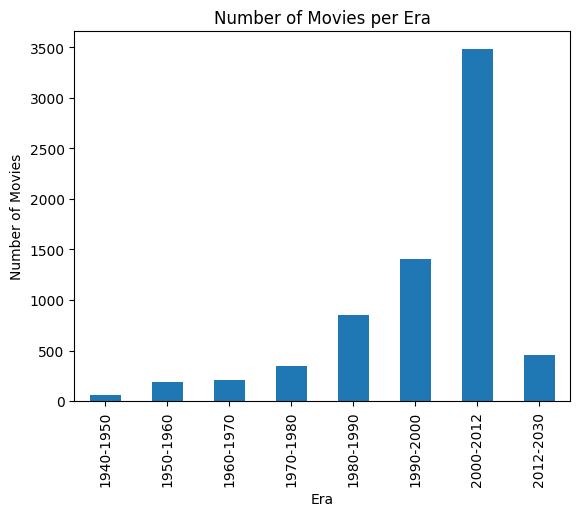

In [839]:
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2013, 2030]
labels = ['1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990','1990-2000', '2000-2012', '2012-2030']

df['era'] = pd.cut(df['release_year'], bins=bins, labels=labels, include_lowest=True)

era_counts = df['era'].value_counts().sort_index()

era_counts.plot(kind='bar')

plt.title('Number of Movies per Era')
plt.xlabel('Era')
plt.ylabel('Number of Movies')

plt.show()


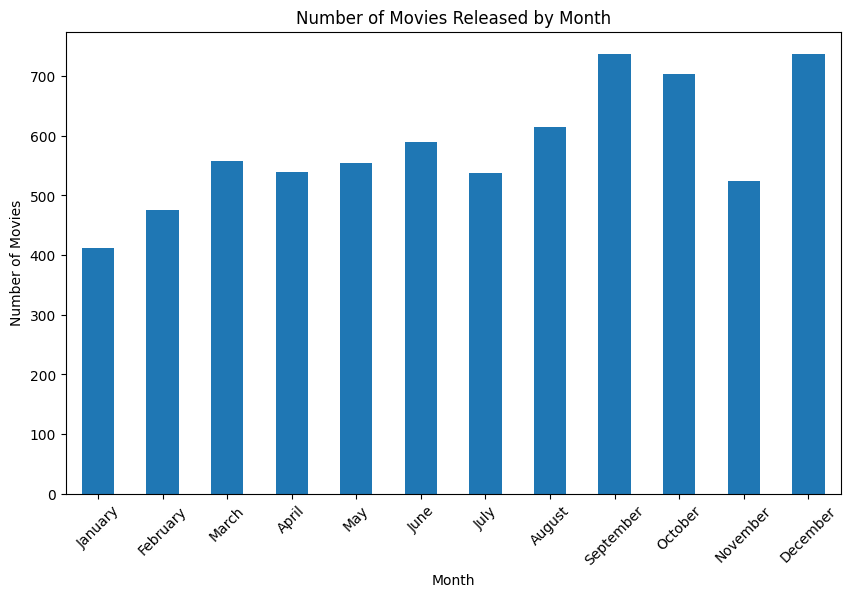

In [808]:
month_counts = df['release_month'].value_counts().sort_index()
month_counts.plot(kind='bar', figsize=(10,6))

plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

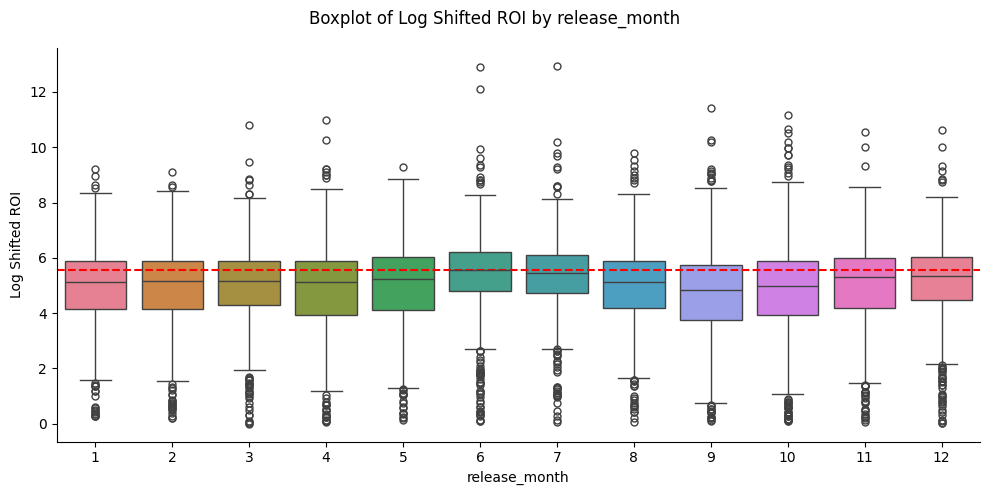

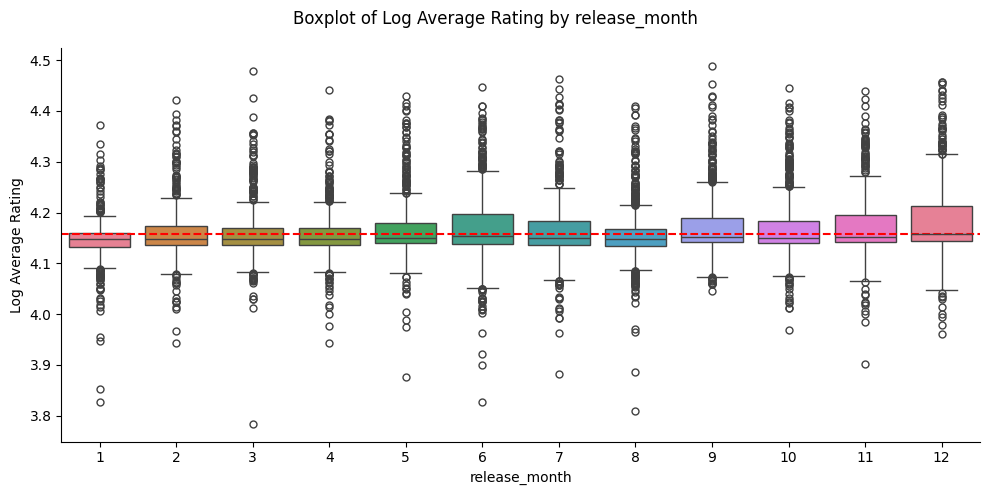

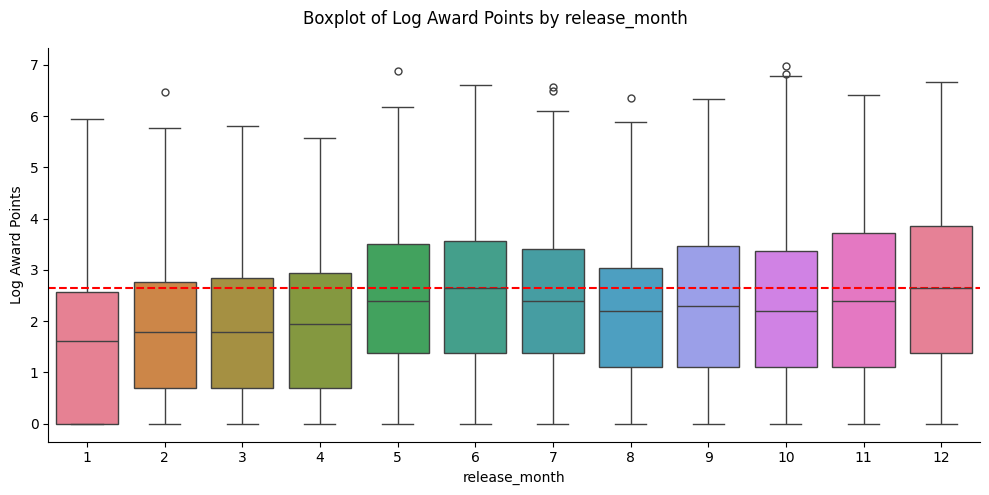

In [809]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def create_boxplot(data, variable, ylabel, group_column):
    # Create a catplot with kind='box' to show one box plot per month
    g = sns.catplot(x=group_column, y=variable, kind='box', data=data, height=5, aspect=2, palette='husl', hue='release_month', legend=False)

    # Set the axis labels and title
    g.set_axis_labels(f'{group_column}', ylabel)
    g.fig.suptitle(f'Boxplot of {ylabel} by {group_column}')

    # Calculate the median values for each month
    medians = data.groupby(group_column)[variable].median()

    # Find the highest median value
    highest_median = medians.max()

    g.ax.axhline(y=highest_median, color='red', linestyle='--')

    plt.tight_layout() 
    plt.show()

df['log_adjusted_ROI'] = np.log(df['shifted_ROI'])
df['log_average_rating'] = np.log(df['average_rating'])
df['log_award_points'] = np.log(df['award_points'] + 1)

create_boxplot(df, 'log_adjusted_ROI', 'Log Shifted ROI', 'release_month')
create_boxplot(df, 'log_average_rating', 'Log Average Rating', 'release_month')
create_boxplot(df, 'log_award_points', 'Log Award Points', 'release_month')


#### ROI (Return On Investment):

- The highest median ROI is observed in the month of June, followed by July, December, and November.
- The lowest median ROI is seen in the month of September, followed by October, January, and August.
- There's a significant increase in median ROI starting from May, peaking in June, and then gradually decreasing, but remaining relatively high through July, November, and December.

#### Rating:

- The highest median rating is observed in December, with a noticeable drop in other months.
- The median rating values are fairly consistent across other months, with minor fluctuations.

#### Awards:

- The highest median awards are observed in December, followed by June.
- There's a noticeable increase in median awards starting from May, peaking in June and December.
- The lowest median awards are observed in January and February.

Based on these observations, a possible way to create a 'seasons' feature could be as follows:

* Winter: January, and February - These months show a peak in ratings and awards, and a trough in ROI (except December).
* Spring: March and April - These months show a moderate level in all three labels.
* Summer: May, June, and July - These months show a peak in ROI and awards.
* Fall: August, September, October, and November - These months show a trough in ROI and a moderate level in ratings and awards, with a spike in ROI in November.

In our dataset, we observed some interesting trends related to the month of December. Specifically, December showed the highest median rating and the highest median number of awards among all months. Additionally, the Return on Investment (ROI) in December was also relatively high, being one of the top performing months.

These trends suggest that December is a special month when it comes to movie performance metrics. One possible explanation for this could be the holiday season. December is a month full of holidays, including Christmas and New Year's Eve, which could lead to higher movie attendance and potentially more awards and higher ratings for movies released during this time.

Text(0.5, 1.0, 'Boxplot of log ROI by seasons')

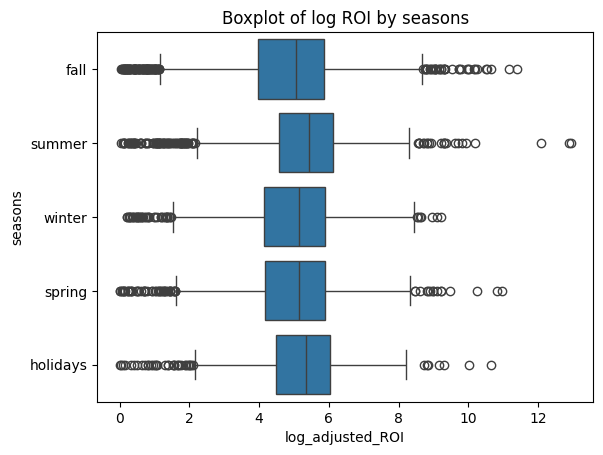

In [810]:
def get_season(month):
    if month in [1, 2]:
        return 'winter'
    elif month == 12:
        return 'holidays'
    elif month in [3, 4]:
        return 'spring'
    elif month in [5, 6, 7]:
        return 'summer'
    else:
        return 'fall'

df['seasons'] = df['release_month'].apply(get_season)

ax = sns.boxplot(x=(df["log_adjusted_ROI"]), y=df['seasons'])
plt.title(f'Boxplot of log ROI by seasons')


Text(0.5, 1.0, 'Boxplot of log Average Raiting by seasons')

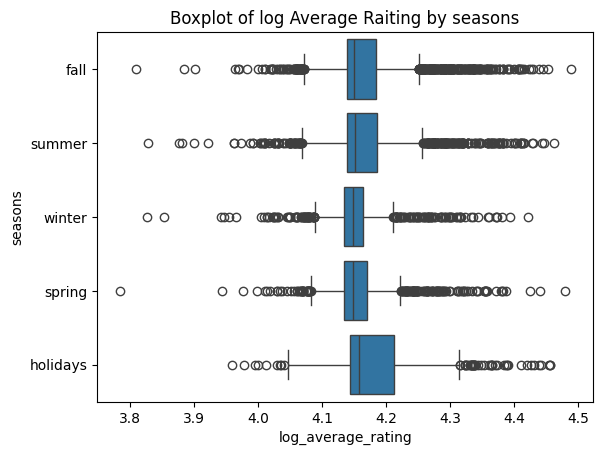

In [811]:
ax = sns.boxplot(x=(df["log_average_rating"]), y=df['seasons'])
plt.title(f'Boxplot of log Average Raiting by seasons')


Text(0.5, 1.0, 'Boxplot of log Award Points by seasons')

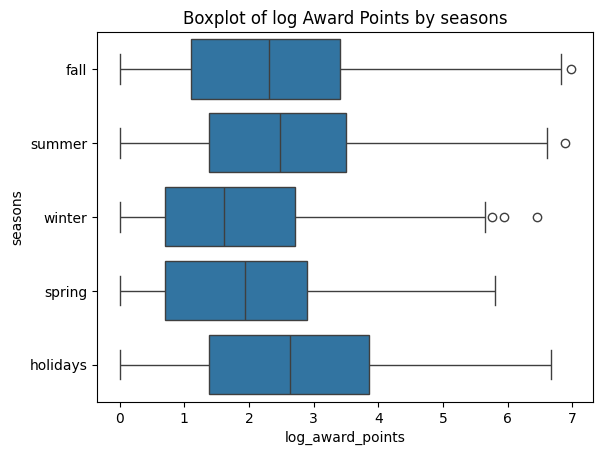

In [812]:

ax = sns.boxplot(x=(df["log_award_points"]), y=df['seasons'])
plt.title(f'Boxplot of log Award Points by seasons')

In [879]:
seasons_dummies = df['seasons'].str.get_dummies(sep=',')
df = pd.concat([df, seasons_dummies], axis=1)


title  release_year  release_month  \
0            the pit and the pendulum          1961              8   
1     universal soldier: regeneration          2009             10   
2                         the heiress          1949             10   
4                     problem child 2          1991              7   
5                                fame          2009              9   
...                               ...           ...            ...   
7392                    the candidate          2013             10   
7393                      hot pursuit          2015              5   
7394                            samba          2014             10   
7395                         zootopia          2016              2   
7396            the canterville ghost          2023              9   

     original_language   spoken_languages  \
0                   en                 en   
1                   en              bg,en   
2                   en                 en   
4                   en              es,en   
5                   en                 en   
...                ...                ...   
7392                sk                 sk   
7393                en              es,en   
7394                fr  ar,fr,en,pt,ru,sr   
7395                en                 en   
7396                en                 en   

                                                 genres  \
0                                         horror,others   
1     moderate performing,others,moderate performing...   
2                     drama,moderate performing,history   
4                            moderate performing,family   
5     others,moderate performing,drama,moderate perf...   
...                                                 ...   
7392                                moderate performing   
7393                  others,moderate performing,others   
7394                          drama,moderate performing   
7395  animation,moderate performing,family,moderate ...   
7396  animation,moderate performing,family,moderate ...   

                                   production_companies production_countries  \
0     alta vista productions,american international ...                   us   
1     foresight unlimited,signature entertainment,ba...                   us   
2                                             paramount                   us   
4              imagine entertainment,universal pictures                   us   
5     united artists,lakeshore entertainment,metro-g...                   us   
...                                                 ...                  ...   
7392                          azyl production,b digital                cz,sk   
7393  new line cinema,pacific standard,metro-goldwyn...                   us   
7394                 ten films,gaumont,quad productions                   fr   
7395  walt disney animation studios,walt disney pict...                   us   
7396  arc productions,melmoth films,sprout pictures,...                ca,gb   

      runtime    rated  ...  history horror moderate performing others  war  \
0          81  unrated  ...        0      1                   0      1    0   
1          97        r  ...        0      0                   1      1    0   
2         115  unrated  ...        1      0                   1      0    0   
4          90    pg-13  ...        0      0                   1      0    0   
5         107       pg  ...        0      0                   1      1    0   
...       ...      ...  ...      ...    ...                 ...    ...  ...   
7392        0  unrated  ...        0      0                   1      0    0   
7393       87    pg-13  ...        0      0                   1      1    0   
7394      118        r  ...        0      0                   1      0    0   
7395      109       pg  ...        0      0                   1      0    0   
7396       89       pg  ...        0      0                   1      0    0   

      fall  holidays  spring  s

#### Genres

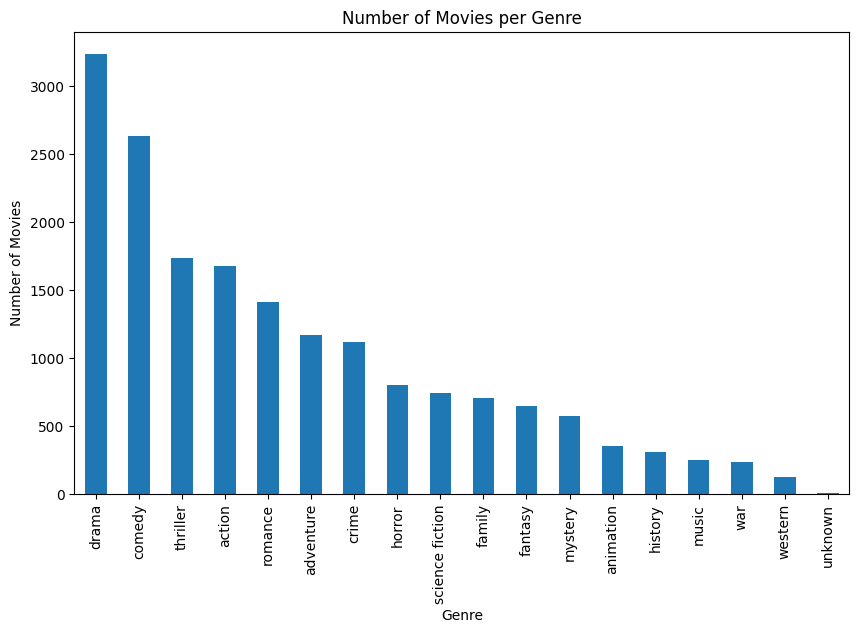

In [840]:
genre_list = df['genres'].str.split(',', expand=True).stack()
genre_counts = genre_list.value_counts()
genre_counts.plot(kind='bar', figsize=(10,6))

plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.show()


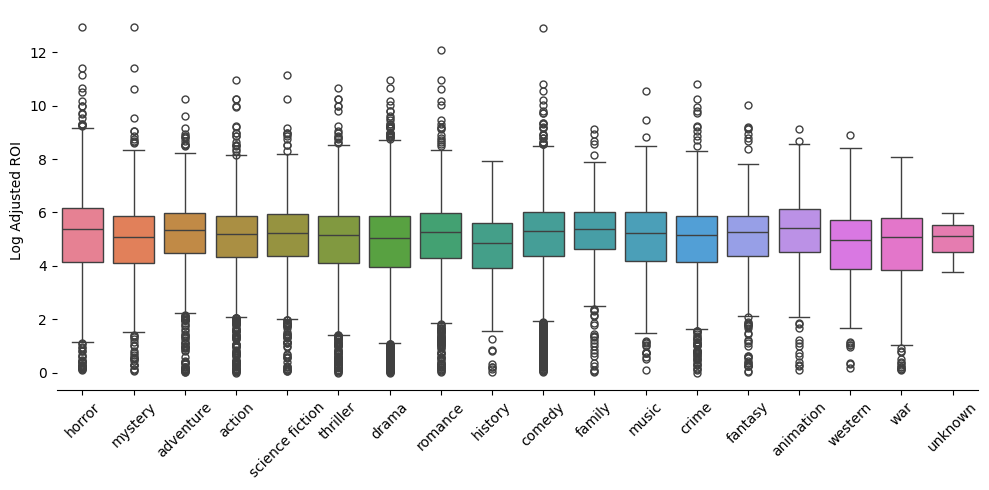

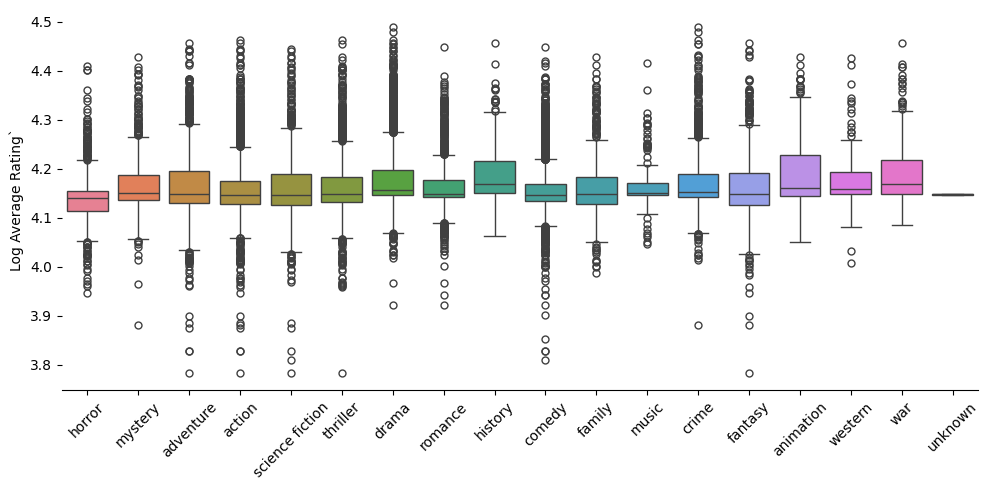

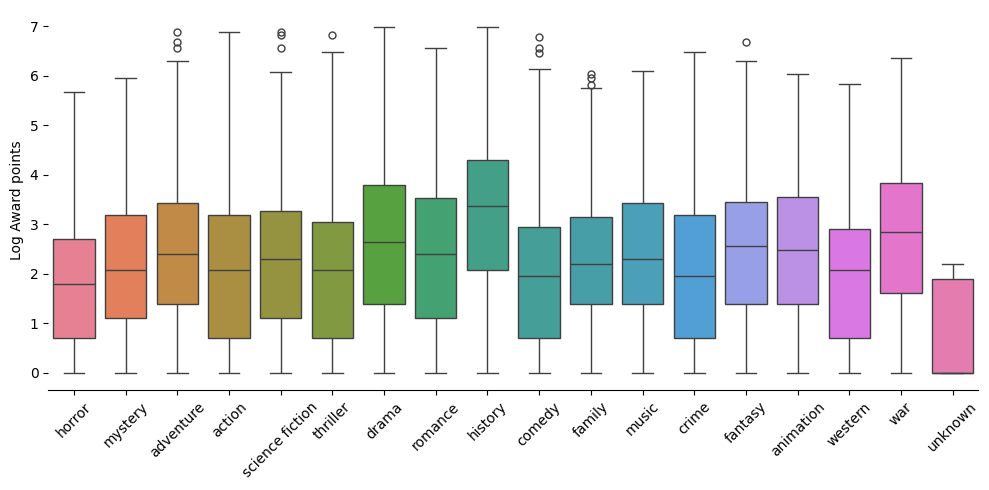

In [870]:
genre_list = df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
df_genre_split = df.join(genre_list).reset_index(drop=True)
g = sns.catplot(x="genre", y='log_adjusted_ROI', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="genre", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Adjusted ROI")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()

g = sns.catplot(x="genre", y='log_average_rating', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="genre", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Average Rating`")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()


g = sns.catplot(x="genre", y='log_award_points', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="genre", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Award points")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()





#### High Performing Genres (across all metrics):

- Animation: Exhibits a higher median ROI, a relatively higher median rating, and a good median awards count.
- Family: Similar to Animation, Family genre also has a higher median ROI and a decent median awards count.
- Horror: Although horror has a lower median rating, it has a high median ROI and a lower median awards count, indicating it might be commercially successful but not critically acclaimed.

####Critically Acclaimed Genres:

- History: Despite having the lowest median ROI, this genre has the highest median awards count and a high median rating, indicating critical acclaim.
- Drama: Drama also has a high median awards count and a relatively higher median rating despite a moderate median ROI.
- War: War genre has a high median awards count and a high median rating with a moderate median ROI.

#### Moderate Performing Genres:

Adventure, Comedy, Fantasy, Romance, Science Fiction, and Thriller: These genres exhibit a moderate performance across all three metrics (ROI, rating, and awards). They can be considered separately or grouped together under a "Moderate Performing" category depending on the goal of your analysis.

#### Low Performing or Less Represented Genres:

Crime, Western, and Unknown: These genres have lower median values across all three metrics, and the 'unknown' genre especially has the lowest representation. They might be grouped together as "Others" or even ignored depending on the context and the goal of the analysis.
Others:

Genres like Music, Mystery, and Action have mixed performance across the three metrics and could be grouped together under an "Others" category.

Let's set Adventure, Comedy, Fantasy, Romance, Science Fiction, and Thriller as a separate category "moderate performing". Music, Mystery, Action, Crime, Western, and Unknown as others and then create dummies from genres column

In [878]:
def replace_genre(genre_string):
    genre_string = genre_string.replace('adventure', 'moderate performing')
    genre_string = genre_string.replace('comedy','moderate performing')
    genre_string = genre_string.replace('fantasy', 'moderate performing')
    genre_string = genre_string.replace('romance', 'moderate performing')
    genre_string = genre_string.replace('science fiction', 'moderate performing')
    genre_string = genre_string.replace('thriller', 'moderate performing')
    genre_string = genre_string.replace('crime', 'others')
    genre_string = genre_string.replace('western', 'others')
    genre_string = genre_string.replace('unknown', 'others')
    genre_string = genre_string.replace('music', 'others')
    genre_string = genre_string.replace('mystery', 'others')
    genre_string = genre_string.replace('action', 'others')
    return genre_string

df['genres'] = df['genres'].apply(replace_genre)

genre_dummies = df['genres'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)

title  release_year  release_month  \
0            the pit and the pendulum          1961              8   
1     universal soldier: regeneration          2009             10   
2                         the heiress          1949             10   
4                     problem child 2          1991              7   
5                                fame          2009              9   
...                               ...           ...            ...   
7392                    the candidate          2013             10   
7393                      hot pursuit          2015              5   
7394                            samba          2014             10   
7395                         zootopia          2016              2   
7396            the canterville ghost          2023              9   

     original_language   spoken_languages  \
0                   en                 en   
1                   en              bg,en   
2                   en                 en   
4                   en              es,en   
5                   en                 en   
...                ...                ...   
7392                sk                 sk   
7393                en              es,en   
7394                fr  ar,fr,en,pt,ru,sr   
7395                en                 en   
7396                en                 en   

                                                 genres  \
0                                         horror,others   
1     moderate performing,others,moderate performing...   
2                     drama,moderate performing,history   
4                            moderate performing,family   
5     others,moderate performing,drama,moderate perf...   
...                                                 ...   
7392                                moderate performing   
7393                  others,moderate performing,others   
7394                          drama,moderate performing   
7395  animation,moderate performing,family,moderate ...   
7396  animation,moderate performing,family,moderate ...   

                                   production_companies production_countries  \
0     alta vista productions,american international ...                   us   
1     foresight unlimited,signature entertainment,ba...                   us   
2                                             paramount                   us   
4              imagine entertainment,universal pictures                   us   
5     united artists,lakeshore entertainment,metro-g...                   us   
...                                                 ...                  ...   
7392                          azyl production,b digital                cz,sk   
7393  new line cinema,pacific standard,metro-goldwyn...                   us   
7394                 ten films,gaumont,quad productions                   fr   
7395  walt disney animation studios,walt disney pict...                   us   
7396  arc productions,melmoth films,sprout pictures,...                ca,gb   

      runtime    rated  ...  war,others,moderate performing  \
0          81  unrated  ...                               0   
1          97        r  ...                               0   
2         115  unrated  ...                               0   
4          90    pg-13  ...                               0   
5         107       pg  ...                               0   
...       ...      ...  ...                             ...   
7392        0  unrated  ...                               0   
7393       87    pg-13  ...                               0   
7394      118        r  ...                               0   
7395      109       pg  ...                               0   
7396       89       pg  ...                               0   

     war,others,moderate performing,drama,moderate performing animation drama  \
0                                                     0               0     0   
1                                                     0      

#### Rated

In [886]:
df['rated'].value_counts()

rated
r          2751
pg-13      1617
unrated    1096
pg         1063
g           216
other       207
nc-17        35
Name: count, dtype: int64

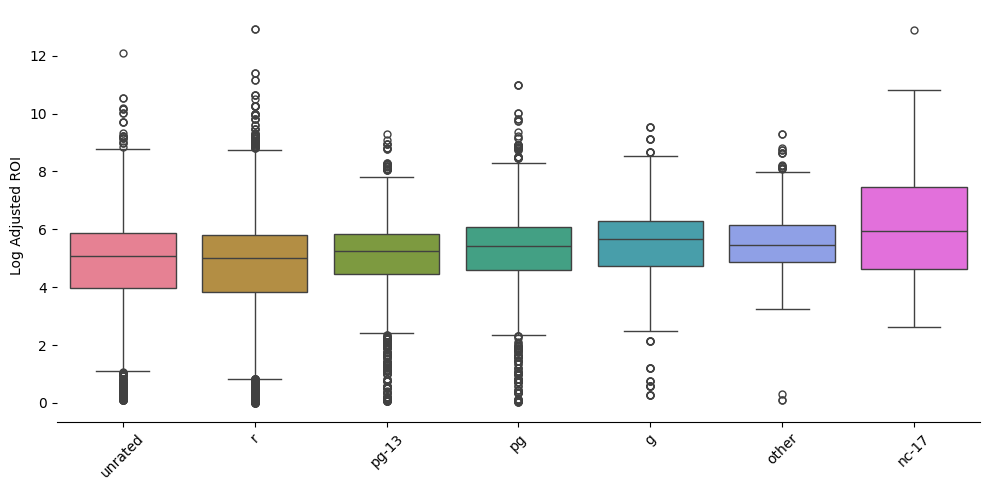

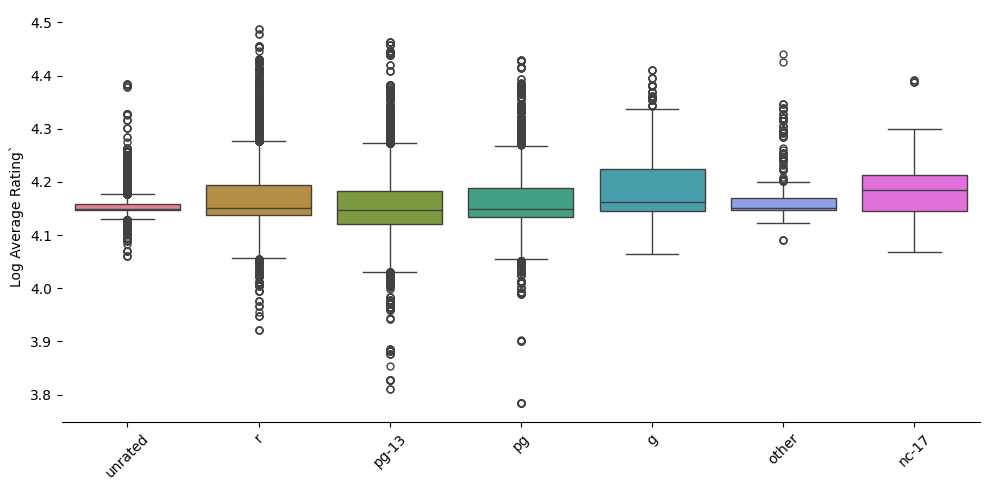

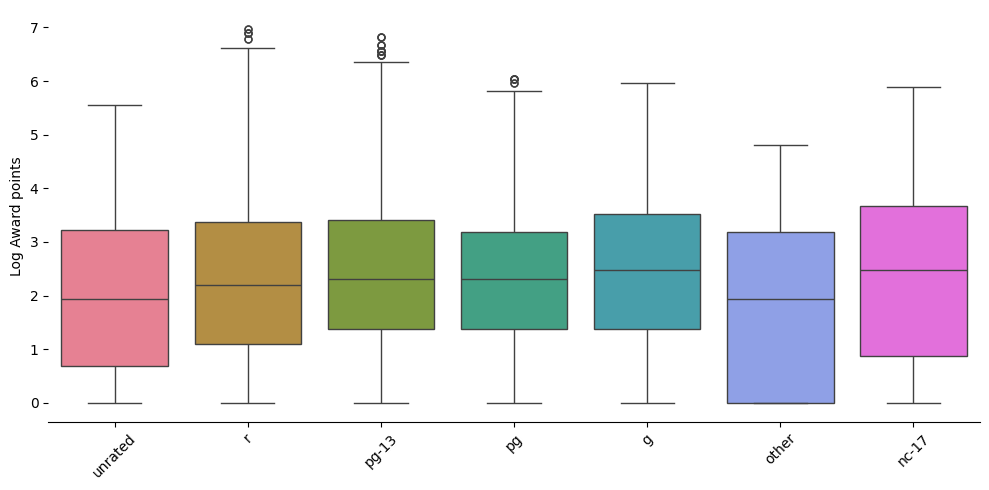

In [881]:
g = sns.catplot(x="rated", y='log_adjusted_ROI', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="rated", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Adjusted ROI")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()

g = sns.catplot(x="rated", y='log_average_rating', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="rated", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Average Rating`")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()


g = sns.catplot(x="rated", y='log_award_points', kind='box', data=df_genre_split, height=5, aspect=2, palette='husl', hue="rated", legend=False)
g.despine(left=True)
g.set_axis_labels("", "Log Award points")
g.set_xticklabels(rotation=45)
plt.tight_layout() 
plt.show()



films rated NC-17 have a higher median ROI compared to other ratings, while films rated G have a higher median in awards and a competitive median ROI.
On the other hand, films rated R have the lowest median ROI and a relatively low median in awards.

If some ratings like NC-17 or Unrated have significantly fewer entries compared to others, however, since NC-17 has a high median ROI, I would leave it as a separate rating, but I will combine Unrated and Others



In [ ]:
df['rated'] = df['rated'].replace('unrated', 'others')

#### List colums: spoken_languages, genres, production_companies, production_countries



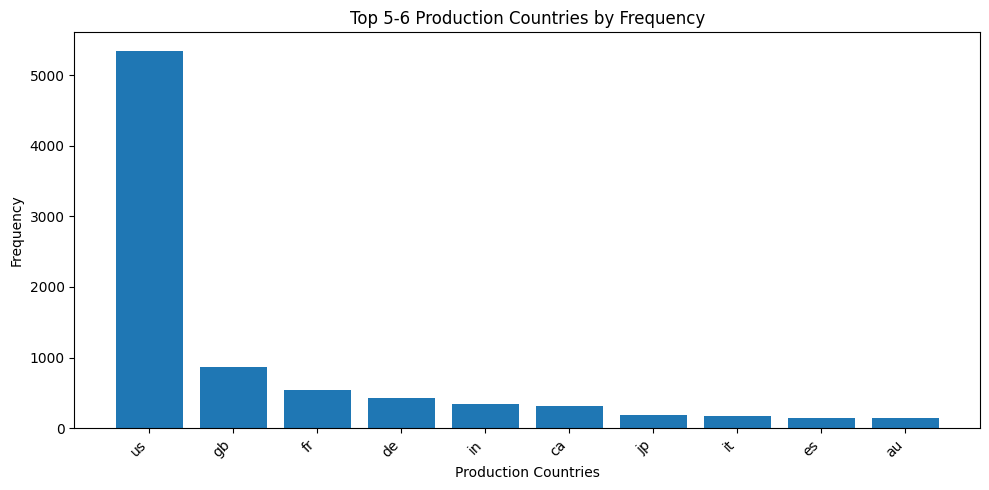

In [818]:
production_c_df = df.copy()
production_c_df['production_countries'] = production_c_df['production_countries'].str.split(',')
genre_counter = Counter(genre for genre_list in production_c_df['production_countries'].dropna() for genre in genre_list)
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['production_countries', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies

top_countries = genre_frequencies.head(10)


plt.figure(figsize=(10, 5))
plt.bar(top_countries['production_countries'], top_countries['frequency'])
plt.xlabel('Production Countries')
plt.ylabel('Frequency')
plt.title('Top 5-6 Production Countries by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

The majority of movies in the dataset are produced in the US

In [819]:
empty_strings = df['production_companies'].value_counts().get('', 0)
print(f"Number of empty strings in column_name: {empty_strings}")

df['production_companies'] = df['production_companies'].replace('', 'no_company')


Number of empty strings in column_name: 0


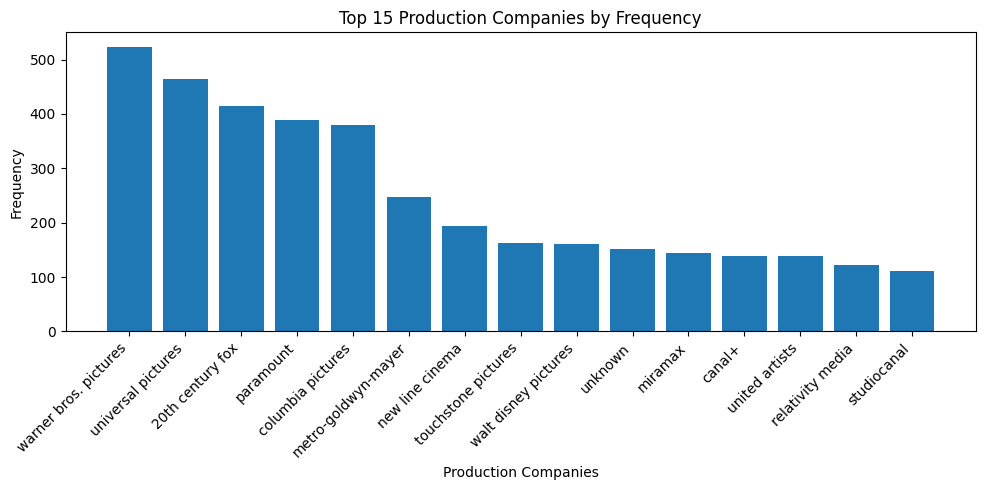

In [820]:
production_c_df = df.copy()
production_c_df['production_companies'] = production_c_df['production_companies'].str.split(',')
genre_counter = Counter(genre for genre_list in production_c_df['production_companies'].dropna() for genre in genre_list)
production_companies = pd.DataFrame(genre_counter.items(), columns=['production_companies', 'frequency'])

production_companies = production_companies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
production_companies.head(10)

top_companies= production_companies.head(15)

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_companies['production_companies'], top_companies['frequency'])
plt.xlabel('Production Companies')
plt.ylabel('Frequency')
plt.title('Top 15 Production Companies by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()


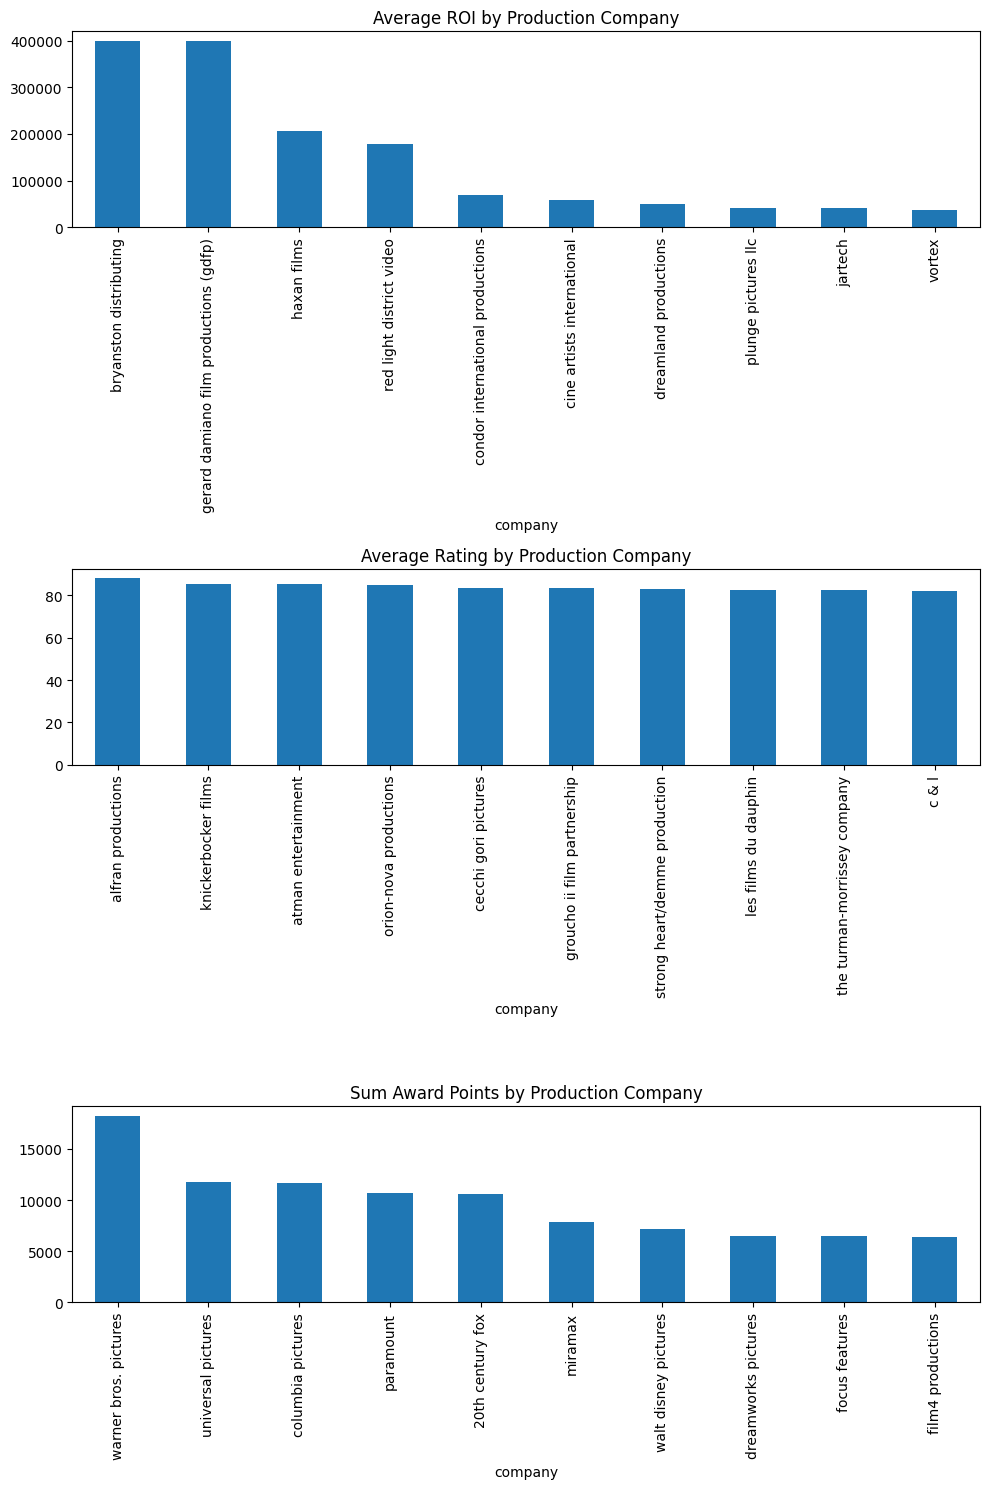

In [821]:
import pandas as pd
import matplotlib.pyplot as plt

companies_expanded = df['production_companies'].str.split(',', expand=True).stack()

roi_values = df.reindex(companies_expanded.index.get_level_values(0))['adjusted_ROI']
rating_values = df.reindex(companies_expanded.index.get_level_values(0))['average_rating']
award_values = df.reindex(companies_expanded.index.get_level_values(0))['award_points']

data = {
    'company': companies_expanded.values,
    'adjusted_ROI': roi_values.values,
    'average_rating': rating_values.values,
    'award_points': award_values.values
}
company_df = pd.DataFrame(data)

company_aggregations = company_df.groupby('company').agg({
    'award_points': 'sum',
    'adjusted_ROI': 'mean',
    'average_rating': 'mean'
})

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sorted_companies = company_aggregations.sort_values(by='adjusted_ROI', ascending=False)
sorted_companies['adjusted_ROI'].head(10).plot(kind='bar', ax=ax[0], title='Average ROI by Production Company')
sorted_companies = company_aggregations.sort_values(by='average_rating', ascending=False)
sorted_companies['average_rating'].head(10).plot(kind='bar', ax=ax[1], title='Average Rating by Production Company')
sorted_companies = company_aggregations.sort_values(by='award_points', ascending=False)
sorted_companies['award_points'].head(10).plot(kind='bar', ax=ax[2], title='Sum Award Points by Production Company')
plt.tight_layout()
plt.show()


In [822]:
lang_df = df.copy()
lang_df['spoken_languages'] = lang_df['spoken_languages'].str.split(',')
# Flatten the list of lists and count the occurrences of each country code
genre_counter = Counter(genre for genre_list in lang_df['spoken_languages'].dropna() for genre in genre_list)
# Convert the Counter object to a DataFrame for easier viewing and analysis
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['spoken_languages', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies.head(10)

spoken_languages  frequency
0               en       5990
1               fr        653
2               es        568
3               de        353
4               it        345
5               ru        340
6               hi        217
7               ja        215
8               zh        159
9               ar        111

And again the majority of movies in the datase uses english as spoken language

Let's compute the count of each item within the list for every row as new features:

In [823]:
df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_genres'] = df['genres'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_production_companies'] = df['production_companies'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_production_countries'] = df['production_countries'].apply(lambda x: len(x.split(',')) if x else 0)
df[['num_spoken_languages', 'num_genres', 'num_production_companies', 'num_production_countries']].describe()

num_spoken_languages  num_genres  num_production_companies  \
count               6985.00     6985.00                   6985.00   
mean                   1.46        2.54                      3.11   
std                    0.91        1.03                      2.24   
min                    1.00        1.00                      1.00   
25%                    1.00        2.00                      2.00   
50%                    1.00        3.00                      3.00   
75%                    2.00        3.00                      4.00   
max                   11.00        7.00                     30.00   

       num_production_countries  
count                   6985.00  
mean                       1.40  
std                        0.82  
min                        1.00  
25%                        1.00  
50%                        1.00  
75%                        2.00  
max                       12.00

In [824]:
df[df['num_production_companies'] == 0]

Empty DataFrame
Columns: [title, release_year, release_month, original_language, spoken_languages, genres, production_companies, production_countries, runtime, rated, tmdb_popularity, cast, crew, belongs_to_collection.name, adjusted_budget, adjusted_revenue, adjusted_ROI, numerical_ROI_category, average_rating, numerical_rating_category, award_points, numerical_award_category, collection, shifted_ROI, is_english, text, overview_sentiment, title_sentiment, tagline_sentiment, plot_sentiment, overview_sentiment_category, title_sentiment_category, tagline_sentiment_category, plot_sentiment_category, era, log_adjusted_ROI, log_average_rating, log_award_points, seasons, genres_list, action, adventure, animation, comedy, crime, drama, family, fantasy, history, horror, music, mystery, romance, science fiction, thriller, unknown, war, western, num_spoken_languages, num_genres, num_production_companies, num_production_countries]
Index: []

[0 rows x 62 columns]

And add is_foreign for those countries that are not US:

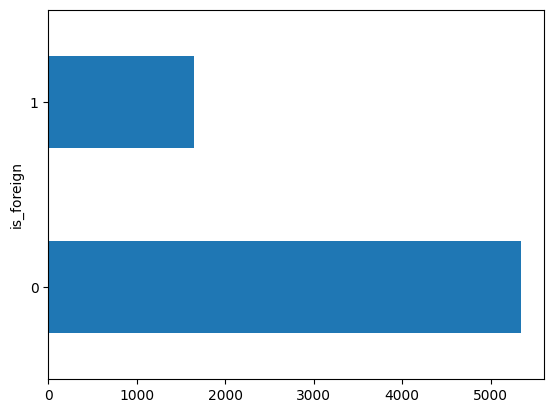

In [825]:
df['is_foreign'] = df['production_countries'].apply(lambda x: 1 if 'us' not in x else 0)
df['is_foreign'].value_counts()
df['is_foreign'].value_counts().plot(kind='barh')
plt.show()

#### Crew

In [826]:
#!TODO: add crew analysis 

In [827]:
import pandas as pd
import ast

df['director_popularity'] = 0
df['director_popularity_list'] = df.apply(lambda x: [], axis=1)
df['director'] = df.apply(lambda x: [], axis=1)
df['writer'] = df.apply(lambda x: [], axis=1)
df['writer_popularity_list'] = df.apply(lambda x: [], axis=1)
df['producer'] = df.apply(lambda x: [], axis=1)
df['producer_popularity_list'] = df.apply(lambda x: [], axis=1)
df['writer_popularity'] = 0
df['producer_popularity'] = 0
df['average_crew_popularity'] = 0
df['number_crew_members'] = 0

def update_popularity(row):
    director = []
    director_popularity_list = []
    writer = []
    writer_popularity_list = []
    producer = []
    producer_popularity_list = []
    director_popularity = 0
    writer_popularity = 0
    producer_popularity = 0
    total_popularity = 0
    num_directors = 0
    num_writers = 0
    num_producers = 0
    num_crew_members = len(row['crew'])
    
    for member in row['crew']:
        job = member.get('job', '')
        name = member.get('name', '')
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        if job == 'director':
            director.append(name)
            director_popularity += popularity
            director_popularity_list.append(popularity)
            num_directors += 1
        elif job in ['writer', 'screenplay']:
            writer.append(name)
            writer_popularity += popularity
            writer_popularity_list.append(popularity)
            num_writers += 1
        elif job == 'producer':
            producer.append(name)
            producer_popularity += popularity
            producer_popularity_list.append(popularity)
            num_producers += 1
    
    # Average the popularity for directors, writers, and producers if there are multiple
    director_popularity /= max(num_directors, 1)
    writer_popularity /= max(num_writers, 1)
    producer_popularity /= max(num_producers, 1)
    
    # Compute the average popularity for all crew members
    average_crew_popularity = total_popularity / max(num_crew_members, 1)
    
    return pd.Series([director, director_popularity_list, writer, writer_popularity_list,producer, producer_popularity_list,  average_crew_popularity, num_crew_members])

df[['director', 'director_popularity', 'writer', 'writer_popularity', 'producer', 'producer_popularity', 'average_crew_popularity', 'number_crew_members']] = df.apply(update_popularity, axis=1)

import pandas as pd

def calculate_top_individuals(role_column, popularity_column):
    rows_list = []
    for index, row in df.iterrows():
        for individual, popularity in zip(row[role_column], row[popularity_column]):
            rows_list.append({role_column: individual, 'popularity': popularity})
    role_df = pd.DataFrame(rows_list)
    role_popularity = role_df.groupby(role_column)['popularity'].agg(['mean', 'count'])
    role_popularity = role_popularity.sort_values(by='mean', ascending=False)

    return role_popularity

top_popularity_directors = calculate_top_individuals('director', 'director_popularity')
top_popularity_writers = calculate_top_individuals('writer', 'writer_popularity')
top_popularity_producers = calculate_top_individuals('producer', 'producer_popularity')

top_fr_directors =  top_popularity_directors.sort_values(by='count', ascending=False)
top_fr_writers =  top_popularity_writers.sort_values(by='count', ascending=False)
top_fr_producers =  top_popularity_producers.sort_values(by='count', ascending=False)


In [828]:
top_popularity_directors_reset = top_popularity_directors.head(10).reset_index()
top_popularity_writers_reset = top_popularity_writers.head(10).reset_index()
top_popularity_producers_reset = top_popularity_producers.head(10).reset_index()
top_fr_directors_reset = top_fr_directors.head(10).reset_index()
top_fr_writers_reset = top_fr_writers.head(10).reset_index()
top_fr_producers_reset = top_fr_producers.head(10).reset_index()

combined_df = pd.concat([
    top_popularity_directors_reset, top_fr_directors_reset, top_popularity_writers_reset,  top_fr_writers_reset,
    top_popularity_producers_reset, top_fr_producers_reset
], axis=1)

combined_df.columns = [
    'Top Popularity Directors', 'Popularity','Frequency',
    'Top Frequency Directors', 'Popularity', 'Frequency',
    'Top Popularity Writers', 'Popularity','Frequency',
    'Top Frequency Writers', 'Frequency','Frequency',
    'Top Popularity Producers', 'Popularity','Frequency',
    'Top Frequency Producers', 'Frequency','Frequency',
]

combined_df.style


#### Cast

In [829]:
#!TODO: add cast analysis 

In [830]:
import pandas as pd
import ast

df['average_cast_popularity'] = 0
df['number_cast_members'] = 0
df['top_cast_popularity'] = 0

def update_cast_popularity(row):
    total_popularity = 0
    top_cast_popularity = 0
    num_cast_members = len(row['cast'])
    
    # Sort the cast members by popularity, in descending order
    sorted_cast = sorted(row['cast'], key=lambda x: x.get('popularity', 0), reverse=True)
    
    for idx, member in enumerate(sorted_cast):
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        # Sum the popularity of the top 4 cast members
        if idx < 4:
            top_cast_popularity += popularity
    
    # Compute the average popularity for all cast members
    average_cast_popularity = total_popularity / max(num_cast_members, 1)
    
    return pd.Series([average_cast_popularity, num_cast_members, top_cast_popularity])

df[['average_cast_popularity', 'number_cast_members', 'top_cast_popularity']] = df.apply(update_cast_popularity, axis=1)
df[['average_cast_popularity', 'number_cast_members', 'top_cast_popularity']].describe()

average_cast_popularity  number_cast_members  top_cast_popularity
count                  6985.00              6985.00              6985.00
mean                      6.12                35.74                89.61
std                       3.61                25.12                56.01
min                       0.60                 1.00                 0.60
25%                       3.59                19.00                45.92
50%                       5.53                29.00                84.52
75%                       7.95                46.00               123.42
max                      44.34               348.00               489.51

#### Feature importance analysis

In [831]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tmdb_popularity', 'cast',
       'crew', 'belongs_to_collection.name', 'adjusted_budget',
       'adjusted_revenue', 'adjusted_ROI', 'numerical_ROI_category',
       'average_rating', 'numerical_rating_category', 'award_points',
       'numerical_award_category', 'collection', 'shifted_ROI', 'is_english',
       'text', 'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'overview_sentiment_category',
       'title_sentiment_category', 'tagline_sentiment_category',
       'plot_sentiment_category', 'era', 'log_adjusted_ROI',
       'log_average_rating', 'log_award_points', 'seasons', 'genres_list',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science fiction',

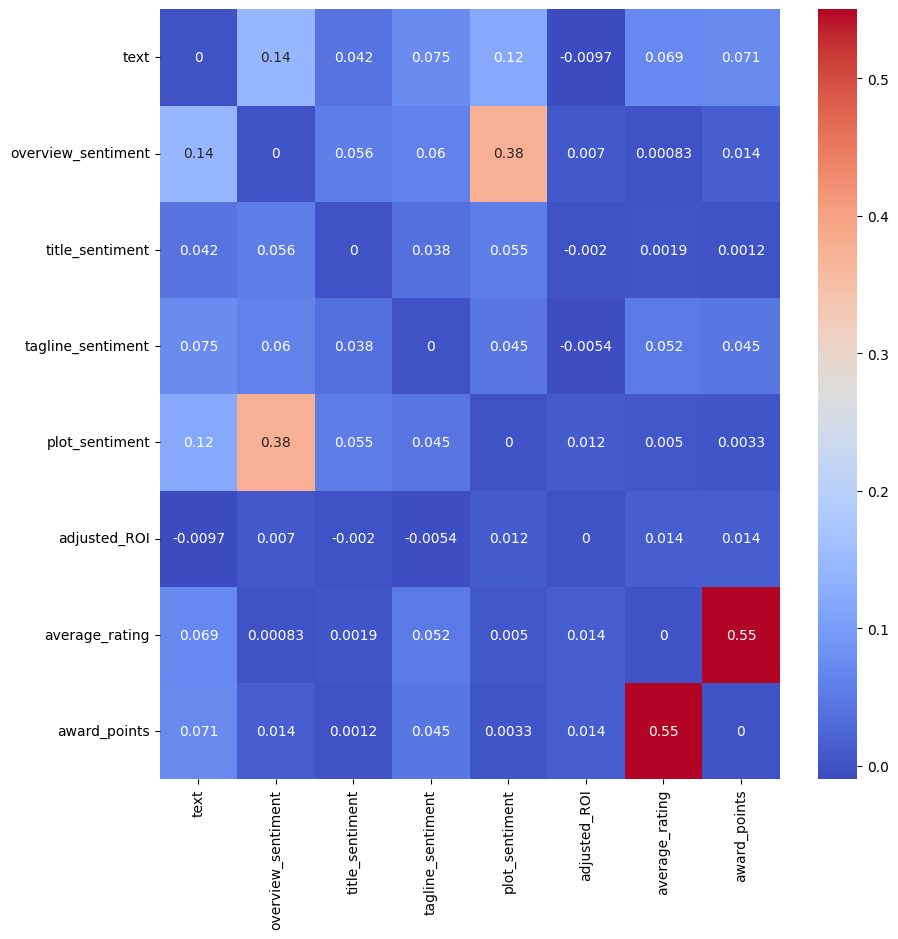

('average_rating', 'award_points')


In [832]:
corr_matrix = df[[ 'text',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'adjusted_ROI', 'average_rating', 'award_points']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

In [833]:
corr_matrix = df[[ "runtime", 'tmdb_popularity', 'num_spoken_languages',
       'num_genres', 'num_production_companies', 'num_production_countries','director_popularity', 'writer_popularity',
       'producer_popularity', 'average_crew_popularity', 'number_crew_members',
       'average_cast_popularity', 'number_cast_members',
       'top_cast_popularity', 'adjusted_ROI', 'average_rating', 'award_points']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

ValueError: setting an array element with a sequence.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as ss

for feature in [ 'release_year', 'release_month',  'rated',  'collection',  'is_english', 'era',
                 'is_summer', 'is_autumn', 
       'is_foreign']:
    for label in ['adjusted_ROI', 'average_rating', 'award_points']:
        # Assume df is your DataFrame, and 'categorical_feature' and 'label' are the column names
        print(feature, label)
        contingency_table = pd.crosstab(df[feature], df[label])
        chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

        print("Chi2 Stat:", chi2_stat)
        print("P Value:", p_val)

        def cramers_v(confusion_matrix):
            chi2 = ss.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

        cramers_v_value = cramers_v(contingency_table)
        print("Cramer's V:", cramers_v_value)


collection adjusted_ROI
Chi2 Stat: 5626.57250865935
P Value: 0.26267397120856617
Cramer's V: 0.10696274232710096

The p-value of 0.263 indicates that the association between collection and adjusted_ROI is not statistically significant at the common alpha level of 0.05. However, Cramer's V value of 0.107 suggests a weak association between the two variables. This could imply that while there is a pattern, it's not strong enough to be statistically significant. It's advisable to consider other features or a combination of features to improve predictive performance.

era award_points
Chi2 Stat: 7363.202378355073
P Value: 0.0
Cramer's V: 0.33412289423928143

The results indicate a statistically significant association between the era and award_points variables, as evidenced by the p-value of 0.0 (below the common alpha level of 0.05). Additionally, the Cramer's V value of 0.334 suggests a moderate association between these two variables. This might indicate that the era in which a movie was released could have an impact on its award points, and could be a useful feature in predictive modeling.

is_foreign award_points
Chi2 Stat: 367.50493422858233
P Value: 0.0003931583927726182
Cramer's V: 0.12279156977315503

The Chi-square test indicates a statistically significant association between the is_foreign and award_points variables, with a p-value of 0.0004 (which is below the common alpha level of 0.05). The Cramer's V value of 0.123 suggests a small to moderate association between these two variables. This might indicate that whether a movie is foreign or not could have some impact on its award points, making is_foreign a potentially useful feature for analysis or predictive modeling.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as ss


for feature in [ 'release_year', 'release_month',  'rated',  'collection',  'is_english', 'era',
                 'is_summer', 'is_autumn', 
       'is_foreign']:
    for label in ['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']:
        # Assume df is your DataFrame, and 'categorical_feature' and 'label' are the column names
        print(feature, label)
        contingency_table = pd.crosstab(df[feature], df[label])
        chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

        print("Chi2 Stat:", chi2_stat)
        print("P Value:", p_val)

        def cramers_v(confusion_matrix):
            chi2 = ss.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

        cramers_v_value = cramers_v(contingency_table)
        print("Cramer's V:", cramers_v_value)


In [ ]:
#df['release_year'] = df['release_year'].astype('str')
#df['release_month'] = df['release_month'].astype('str')

dataset_df = df[['release_year', 'release_month', 'runtime', 'rated', 'collection', 
                 'is_english', 'title_vector',
                'overview_vector', 'tagline_vector', 'plot_vector',
                'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
                'plot_sentiment', 'era', 'is_summer', 'is_autumn',
                'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
                'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
                'science fiction', 'thriller', 'war', 'western', 'num_spoken_languages',
                'num_genres', 'num_production_companies', 'num_production_countries',
                'is_foreign', 'director_popularity', 'writer_popularity',
                'producer_popularity', 'average_crew_popularity', 'number_crew_members',
                'average_cast_popularity', 'number_cast_members',
                'top_cast_popularity', 
                'numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']].copy()
# !TODO: I removed 'tmdb_popularity'!!!!

In [ ]:
from sklearn.model_selection import train_test_split, train_test_split
df_full_train, df_test = train_test_split(dataset_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

#! TODO: need to understand distribution of labels

X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

y_train = df_train[['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']].copy()
y_val = df_val[['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']].copy()
y_test = df_test[['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']].copy()

X_train.drop(['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category'], axis=1, inplace=True)
X_val.drop(['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category'], axis=1, inplace=True)
X_test.drop(['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler



# Now use X_train_scaled and X_val_scaled instead of X_train and X_val in your loop.
dv = DictVectorizer(sparse=False)
X_train_t = dv.fit_transform(X_train.to_dict(orient='records'))
X_val_t = dv.transform(X_val.to_dict(orient='records'))

# Scale the data
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train_t)
X_val_t = scaler.transform(X_val_t)


#### RandomForestClassifier feature importance for 'numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for label in ['numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']:
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train_t, y_train[label])

    # Get feature importances
    importances = rf.feature_importances_

    # Match importances with feature names
    feature_importances = pd.DataFrame({'feature': dv.get_feature_names_out(), 'importance': importances})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    sns.set_style('whitegrid')
    plt.figure(figsize=(10,12))
    sns.barplot(x='importance', y='feature', data=feature_importances.sort_values('importance', ascending=False))
    plt.title(f'Feature Importance for {label}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


#### MultiOutputClassifier feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

# Assuming your data preparation steps are correct and already executed

# Training MultiOutputClassifier with RandomForest
forest = RandomForestClassifier(random_state=1, n_jobs=-1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train_t, y_train)

# Getting feature importances
importances = multi_target_forest.estimators_[0].feature_importances_

# Getting feature names
feature_names = dv.get_feature_names_out()

# Creating a DataFrame for feature importances
df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sorting the features based on importance
df_importances = df_importances.sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
dataset = df[['release_year', 'release_month', 'runtime', 'rated', 'collection', 
                 'is_english', 'title_vector',
                'overview_vector', 'tagline_vector', 'plot_vector',
                'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
                'plot_sentiment', 'era', 'is_summer', 'is_autumn',
                'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
                'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
                'science fiction', 'thriller', 'war', 'western', 'num_spoken_languages',
                'num_genres', 'num_production_companies', 'num_production_countries',
                'is_foreign', 'director_popularity', 'writer_popularity',
                'producer_popularity', 'average_crew_popularity', 'number_crew_members',
                'average_cast_popularity', 'number_cast_members',
                'top_cast_popularity', 'numerical_ROI_category', 'numerical_rating_category', 'numerical_award_category']]

dataset.to_parquet('dataset.parquet')


In [ ]:
dataset.dtypes